# Diagnosis of COVID-19 and its clinical spectrum (EDA)

# Project Overview

  >The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

  >Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

  >Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

  >One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

## Objective

> Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

## Import the dataset

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "dataset.xlsx"

data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "einsteindata4u/covid19",
  file_path,
)

df = data.copy()

In [ ]:
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                     

# Explore the Dataset (Exploratory Data Analysis)

> The aim of this part is to understand as much as possible our data to develop a first modelling strategy

## Structural Analysis

- Target Variable : **SARS-Cov-2 exam result** of type Object (negative/positive)
- Row and columns : **5644, 111**
- Types of variables :
  - **int64: 4**
  - **float64: 70**
  - **object_ (strings) : 37**

In [ ]:
df.shape

(5644, 111)

In [ ]:
df.columns.values

array(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella p

In [ ]:
df.dtypes.sort_values()

Patient age quantile                                       int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
ctO2 (arterial blood gas analysis)                       float64
Alkaline phosphatase                                     float64
Indirect Bilirubin                                       float64
Direct Bilirubin                                         float64
Total Bilirubin                                          float64
Gamma-glutamyltransferase                                float64
Aspartate transaminase                                   float64
Relationship (Patient/Normal)                            float64
Partial thromboplastin time (PTT)                        float64
Ionized calcium                                          float64
Sodium                                                   float64
Potassium                                                float64
Creatinine                                               float64
Proteina C reativa mg/dL                                 float64
Alanine transaminase                                     float64
Phosphor                                                 float64
Hb saturation (venous blood gas analysis)                float64
pCO2 (venous blood gas analysis)                         float64
Urine - Red blood cells                                  float64
Myeloblasts                                              float64
Myelocytes                                               float64
Metamyelocytes                                           float64
Promyelocytes                                            float64
Segmented                                                float64
Magnesium                                                float64
Rods #                                                   float64
pH (venous blood gas analysis)                           float64
Total CO2 (venous blood gas analysis)                    float64
Fio2 (venous blood gas analysis)                         float64
pO2 (venous blood gas analysis)                          float64
Base excess (venous blood gas analysis)                  float64
Urea                                                     float64
HCO3 (venous blood gas analysis)                         float64
Urine - Density                                          float64
Neutrophils                                              float64
Lactic Dehydrogenase                                     float64
Monocytes                                                float64
International normalized ratio (INR)                     float64
Eosinophils                                              float64
Mean corpuscular hemoglobin (MCH)                        float64
Basophils                                                float64
Leukocytes                                               float64
Red blood cell distribution width (RDW)                  float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Red blood Cells                                          float64
Mean platelet volume                                     float64
Platelets                                                float64
Hemoglobin                                               float64
Hematocrit                                               float64
Arteiral Fio2                                            float64
Lymphocytes                                              float64
Serum Glucose                                            float64
Mean corpuscular volume (MCV)                            float64
HCO3 (arterial blood gas analysis)                       float64
Prothrombin time (PT), Activity                          float64
Vitamin B12                                              float64
Creatine phosphokinase (CPK)                             float64
pO2 (arterial blood gas analysis)  

In [ ]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

## Missing values Analysis

Missing values are represented as "white" on the heatmap visualization.

**Analysis**:
- Heatmap Visualisation of missing values
- Proportion of missing values for each variables



**Some key observations**

- As we can see, our dataset is very sparse with a lot of missing values.
- We can observe lines, which probably mean that these variables are related (comes from the same clinical test).
- There are variables where with more than 90% of missing values. Even some columns without any value provided (eg. Urine - Sugar).
- The target value is always referenced

**Actions taken**:
- We can make the decision to drop columns with missing values percentage above 90% because we probably won't be able to gain anything from them.
- Additionnaly, the patient ID columns is meaningless so we can discard it as well.

**Future Consideration**: Missing value handling for sparse dataset

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Mycoplasma pneumoniae                                    5644
Prothrombin time (PT), Activity                          5644
D-Dimer                                                  5644
Urine - Sugar                                            5644
Partial thromboplastin time (PTT)                        5644
                                                         ... 
Patient age quantile                                        0
Patient addmited to regular ward (1=yes, 0=no)              0
SARS-Cov-2 exam result                                      0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Length: 111, dtype: int64

Our dataset is sparse and have a lot of undefined/missing values. The challenge here is to have an overview of the missing values and come up with a strategy to handle them.

> A good way to visualise is to use Seaborn's heatmap visualisation.

<Axes: >

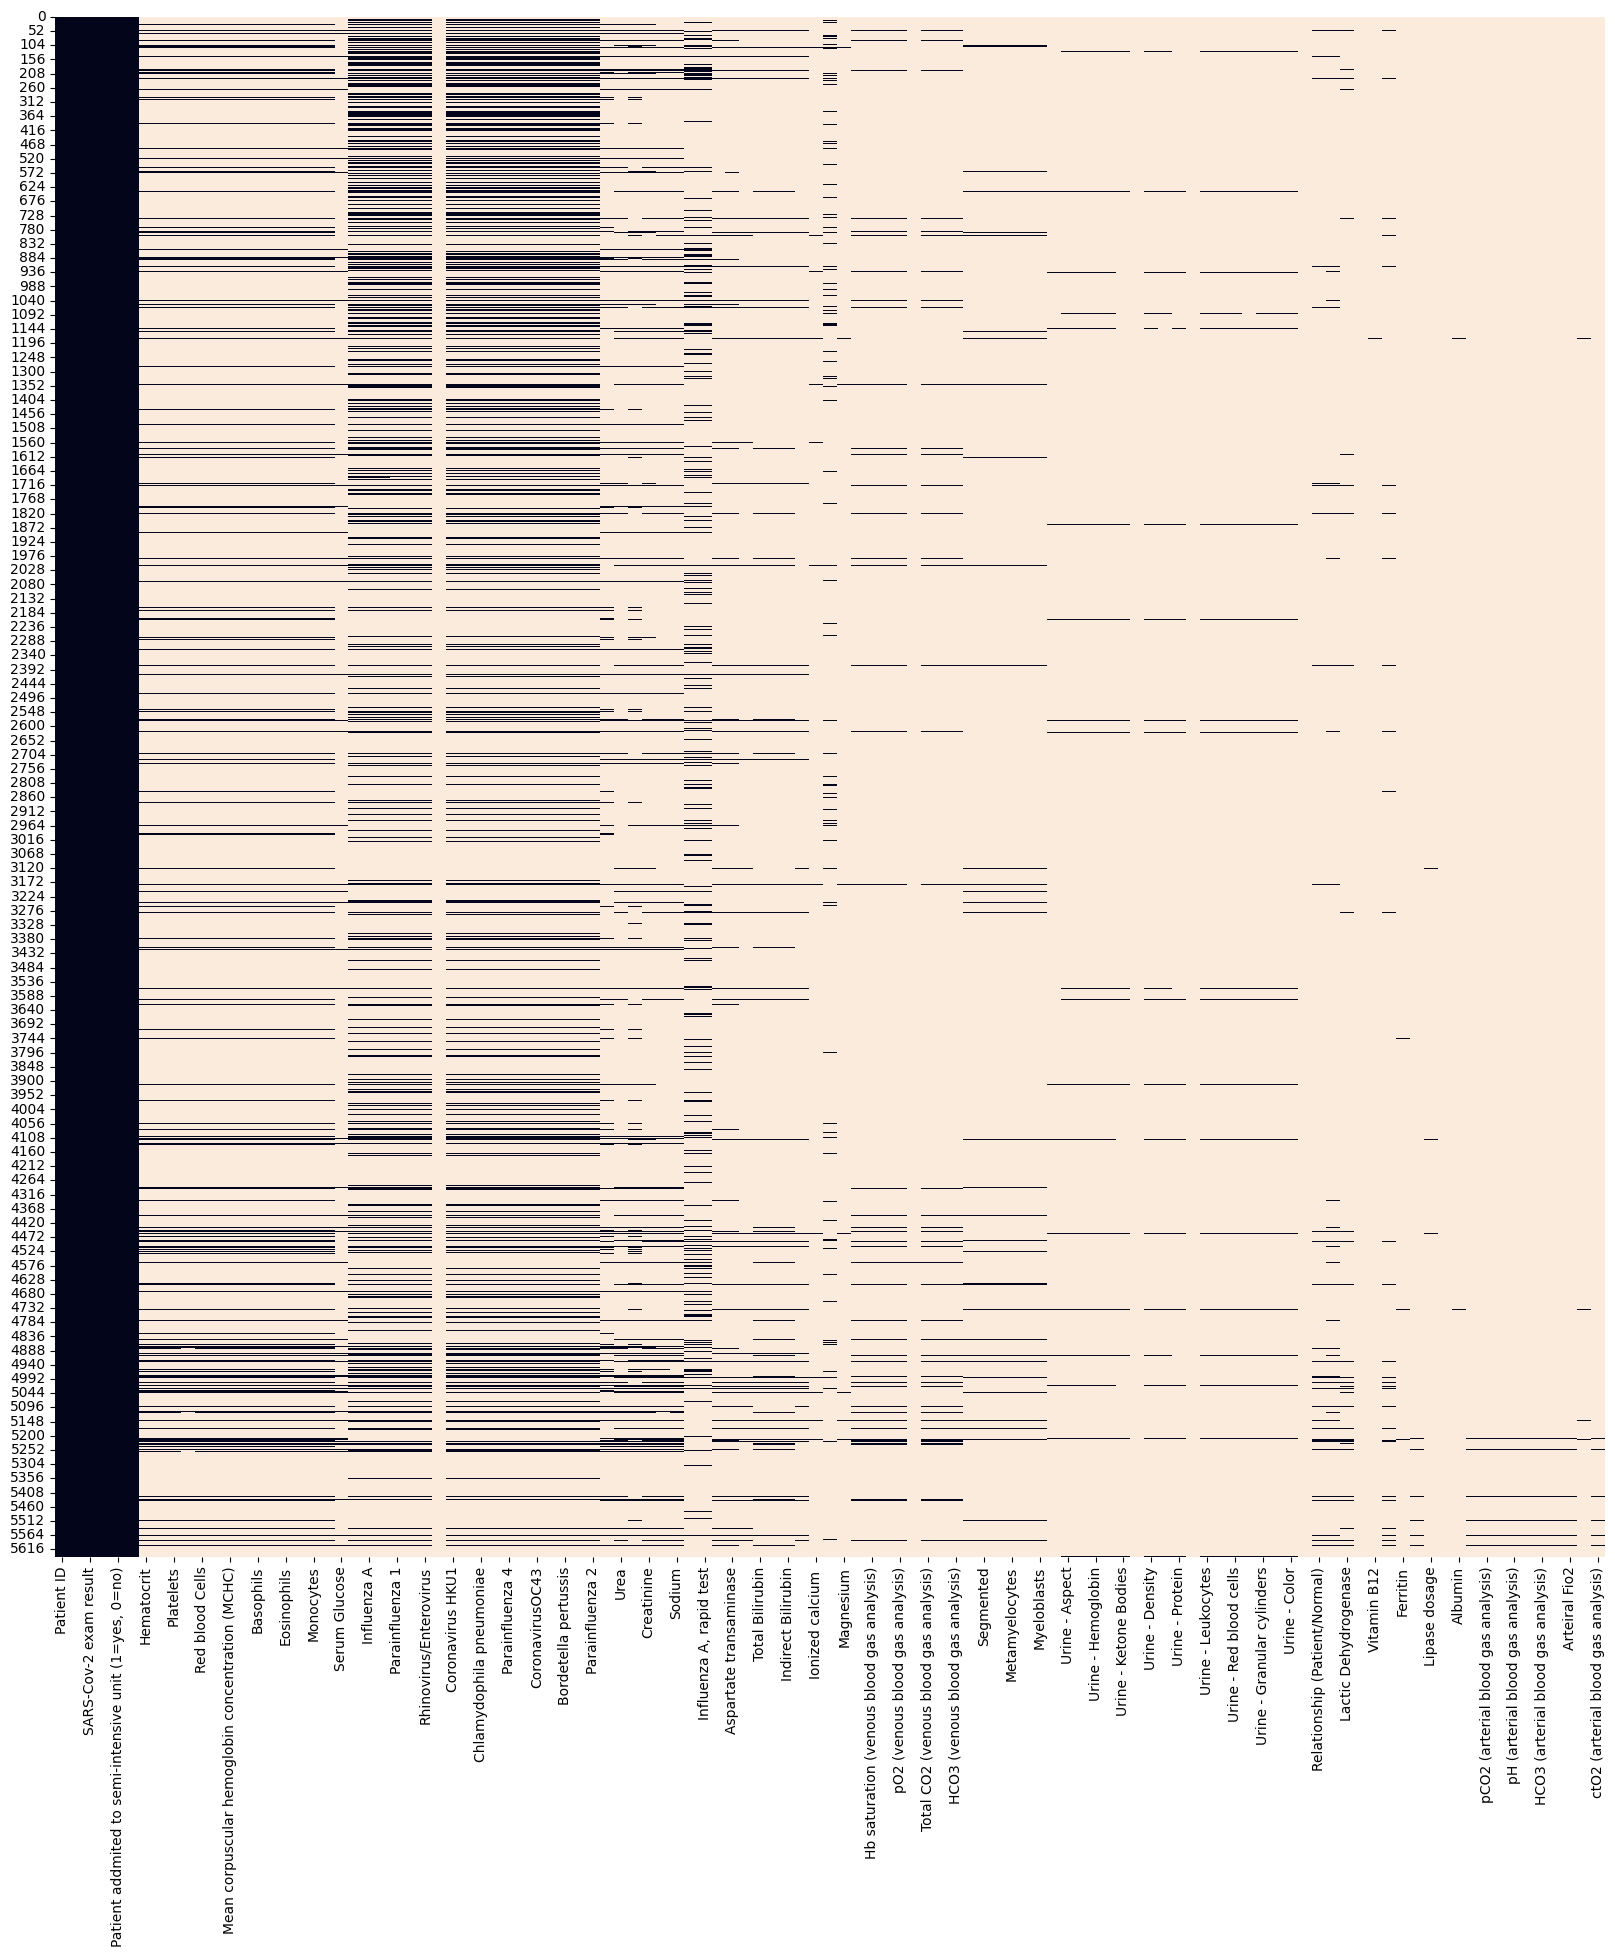

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Urine - Sugar                                            1.000000
Mycoplasma pneumoniae                                    1.000000
Partial thromboplastin time (PTT)                        1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Fio2 (venous blood gas analysis)                         0.999823
Urine - Nitrite                                          0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral Fio2                                            0.996456
Ferritin                                                 0.995925
Arterial Lactic Acid                                     0.995216
ctO2 (arterial blood gas analysis)                       0.995216
Hb saturation (arterial blood gases)                     0.995216
Total CO2 (arterial blood gas analysis)                  0.995216
pCO2 (arterial blood gas analysis)                       0.995216
Base excess (arterial blood gas analysis)                0.995216
pO2 (arterial blood gas analysis)                        0.995216
HCO3 (arterial blood gas analysis)                       0.995216
pH (arterial blood gas analysis)                         0.995216
Magnesium                                                0.992913
Ionized calcium                                          0.991141
Urine - Ketone Bodies                                    0.989901
Urine - Protein                                          0.989369
Urine - Esterase                                         0.989369
Urine - Hyaline cylinders                                0.988129
Urine - Granular cylinders                               0.987775
Urine - Urobilinogen                                     0.987775
Urine - Hemoglobin                                       0.987597
Urine - Bile pigments                                    0.987597
Urine - Density                                          0.987597
Urine - Aspect                                           0.987597
Urine - pH                                               0.987597
Urine - Crystals                                         0.987597
Urine - Red blood cells                                  0.987597
Urine - Yeasts                                           0.987597
Urine - Leukocytes                                       0.987597
Urine - Color                                            0.987597
Relationship (Patient/Normal)                            0.983877
Rods #                                                   0.982814
Myelocytes                                               0.982814
Promyelocytes                                            0.982814
Metamyelocytes                                           0.982814
Myeloblasts                                              0.982814
Segmented                                                0.982814
Lactic Dehydrogenase                                     0.982105
Creatine phosphokinase (CPK)                             0.981573
International normalized ratio (INR)                     0.976435
pCO2 (venous blood gas analysis)                         0.975904
pH (venous blood gas analysis)                           0.975904
Total CO2 (venous blood gas analysis)                    0.975904
pO2 (venous blood gas analysis)                          0.975904
Base excess (venous blood gas analysis)                  0.975904
Hb saturation (venous blood gas analysis)                0.975904
HCO3 (venous blood gas analysis)                         0.975904
Alkaline phosphatase                                     0.974486
Gamma-glutamyltransferase                                0.972892
Indirect Bilirubin                                       0.967753
Direct Bilirubin                        

In [ ]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df = df.drop(columns=["Patient ID"], axis=1)

<Axes: >

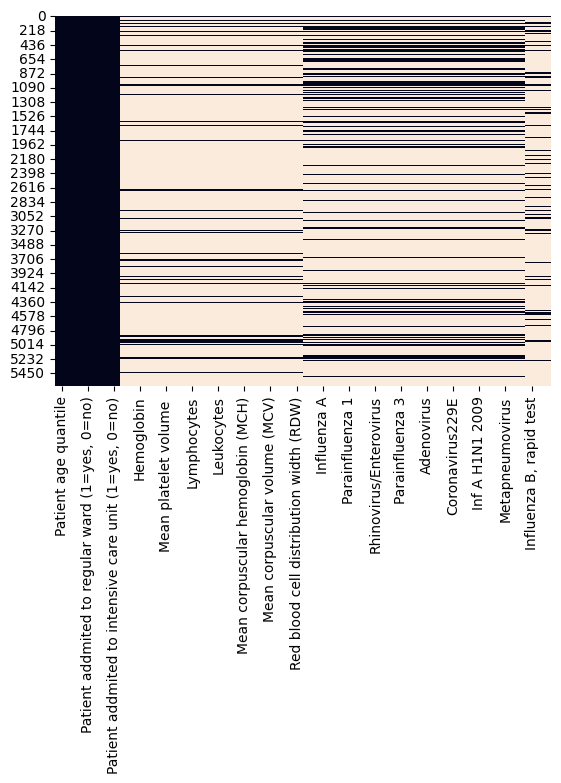

In [ ]:
sns.heatmap(df.isna(), cbar=False)

## Substantive Analysis

Now that we performed a structual analysis. we can delve into the structural analysis of our data.

### Analysis
- count/ratio of target class
- Distribution plot of quantitive variables
- Distribution plot of *Patient age quantile*

### Key observations:

- **Target variable**:
  - Unbalanced dataset wih 10% positives class
- **Meaning of variables**:
  - continuous standaraized variables, skewed for blood tests.
  - Patient age quantile: hard to interpret since the data has been transformed but we don't have information regarding it.  
  - qualitative variables : binary, about detection of virals, Rhinovirus seems very high.
- **Relationship between variables and target**

### Action Taken:
- None

### Future considerations
- Unbalanced class require use of recall, precision, F1 metrics

### Target Variables Analysis

In [ ]:
df['SARS-Cov-2 exam result'].value_counts(), df['SARS-Cov-2 exam result'].value_counts(normalize=True)

(SARS-Cov-2 exam result
 negative    5086
 positive     558
 Name: count, dtype: int64,
 SARS-Cov-2 exam result
 negative    0.901134
 positive    0.098866
 Name: proportion, dtype: float64)

### Quantitative variables

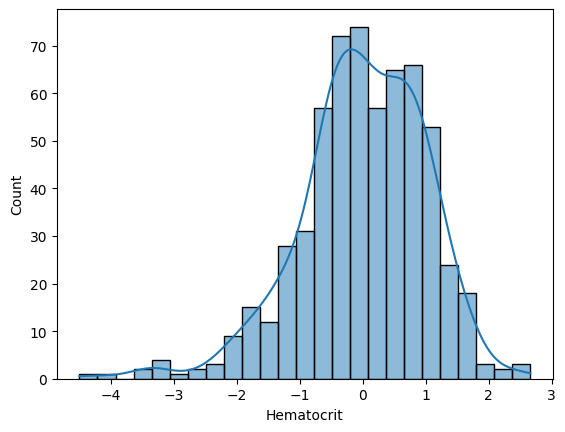

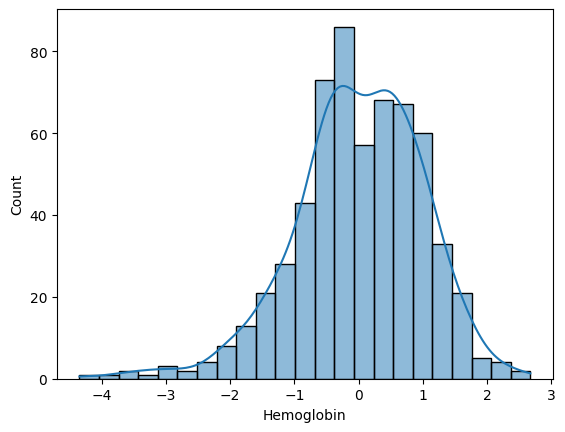

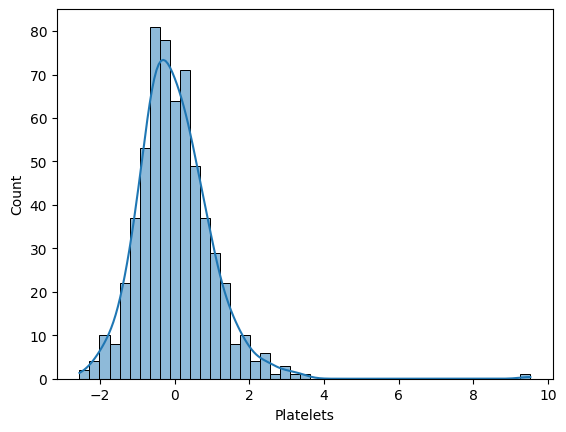

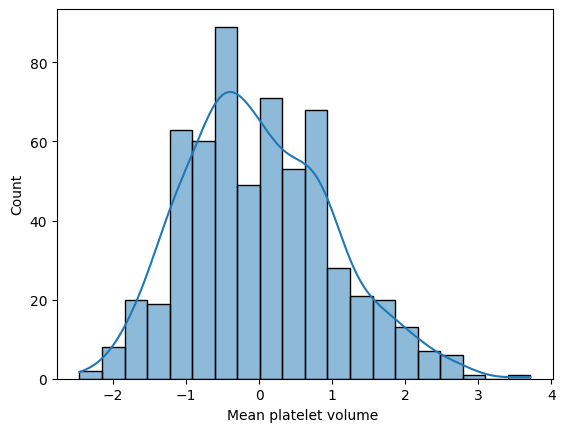

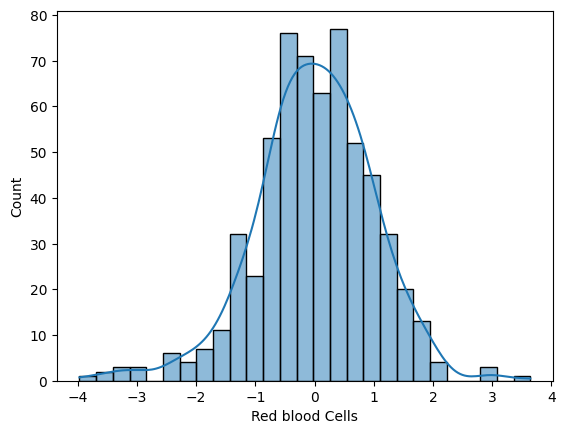

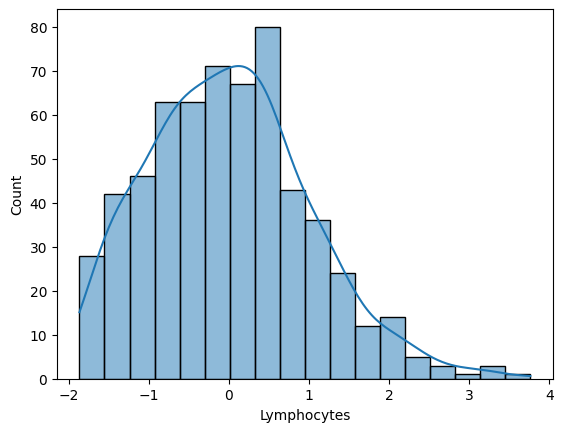

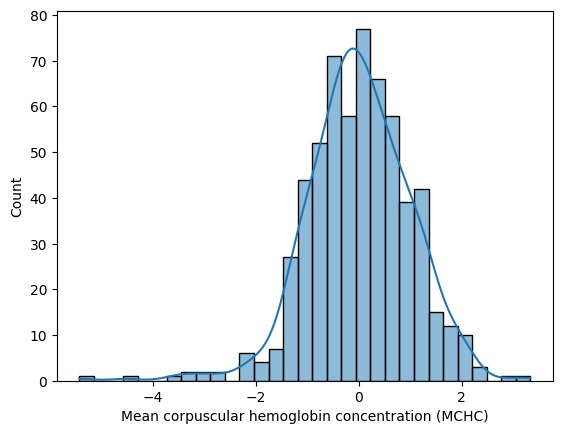

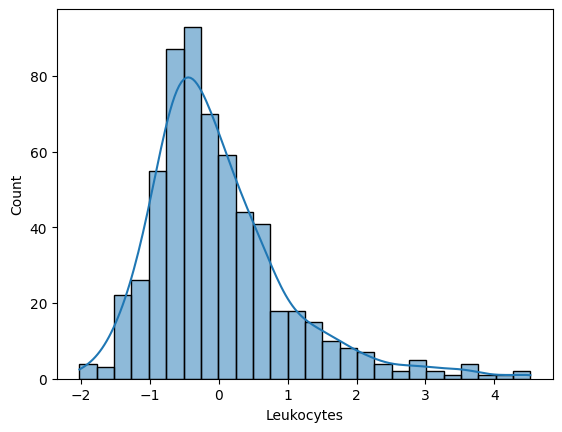

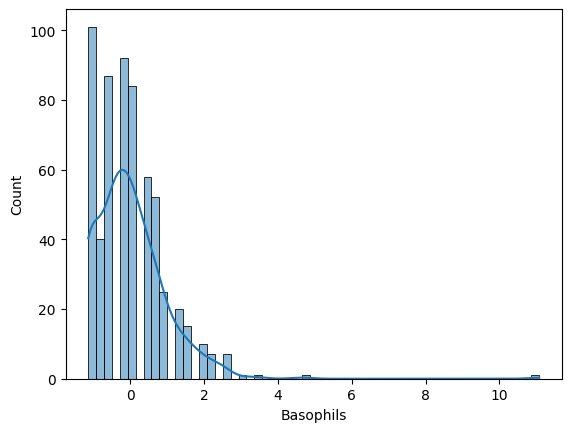

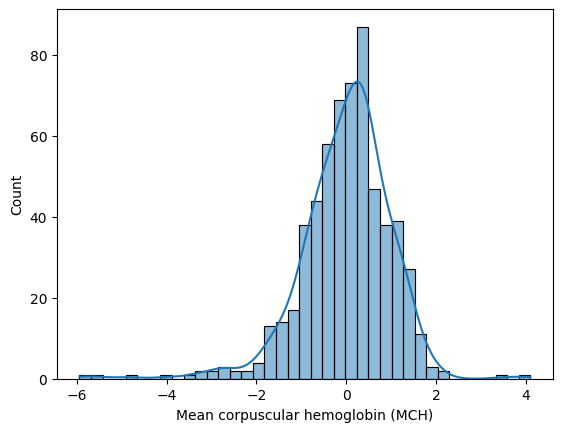

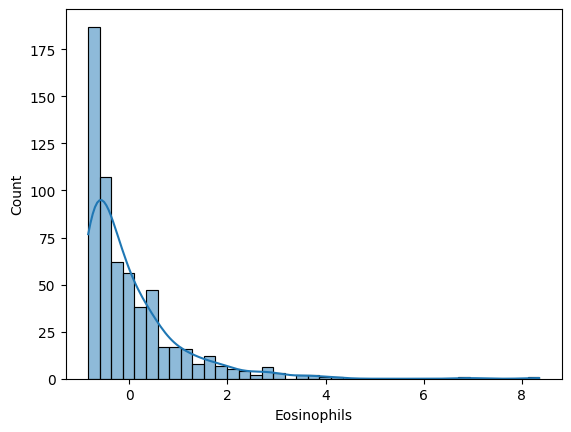

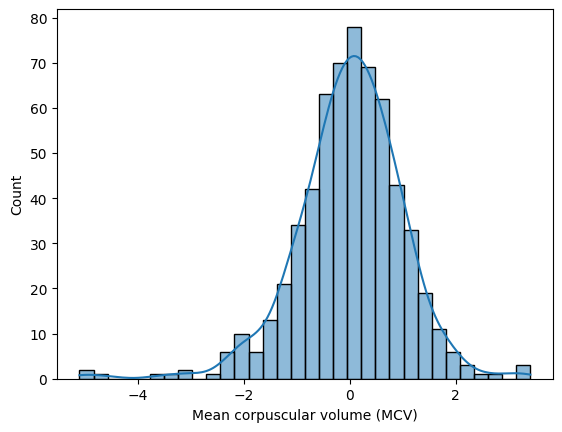

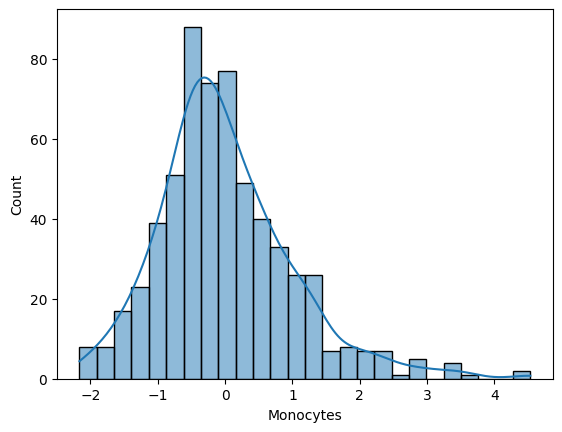

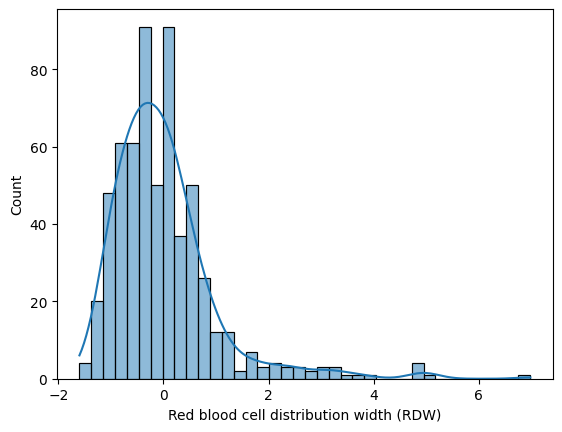

In [ ]:
for c in df.select_dtypes("float"):
  plt.figure()
  sns.histplot(df[c], kde=True)

<Axes: xlabel='Patient age quantile', ylabel='Count'>

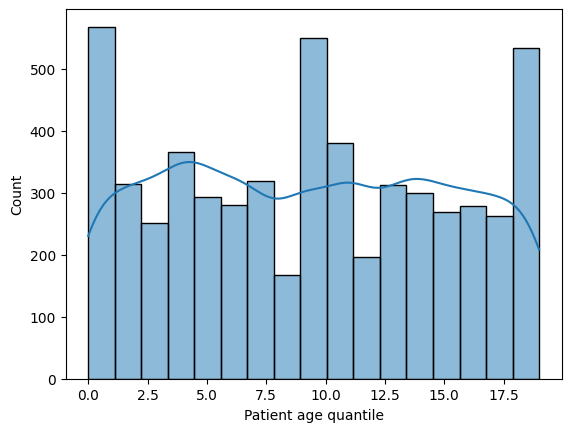

In [ ]:
sns.histplot(df["Patient age quantile"], kde=True)

**Remark**: Interestingly, the age range from 0 to 20. This suggests the patients' age has been processed. However, we lack information on the nature of the processing for the age so we shoul deal with it as it is.

### Qualitative variables

**Analysis**:
- unique value list for each variables
- Pie chart of count for each variables

**Key obsevations**:
- qualitive variables are bicatgorical (either detected or not deteted).
- Parainfuenza 2 variable only takes one value, so it can be discarded.
- In most cases, our variables mainly consist of undetected pathology or disease.
- Influenza A & B and the Rhinovirus have higher rate of positive case.
- Influenza A & B, different outcome from rapid and "classical" test.

**Action taken**:
- Parainfuenza 2 is discarded

**Future Consideration** : These categorical features will be encoded (OHE or Label Encoding)

In [ ]:
for col in df.select_dtypes('object'):
  print(f"[{col : <50} {df[col].unique()}")

[SARS-Cov-2 exam result                             ['negative' 'positive']
[Respiratory Syncytial Virus                        [nan 'not_detected' 'detected']
[Influenza A                                        [nan 'not_detected' 'detected']
[Influenza B                                        [nan 'not_detected' 'detected']
[Parainfluenza 1                                    [nan 'not_detected' 'detected']
[CoronavirusNL63                                    [nan 'not_detected' 'detected']
[Rhinovirus/Enterovirus                             [nan 'detected' 'not_detected']
[Coronavirus HKU1                                   [nan 'not_detected' 'detected']
[Parainfluenza 3                                    [nan 'not_detected' 'detected']
[Chlamydophila pneumoniae                           [nan 'not_detected' 'detected']
[Adenovirus                                         [nan 'not_detected' 'detected']
[Parainfluenza 4                                    [nan 'not_detected' 'detected']


**Remark**: We can see that our qualitive variables are bicatgorical (either detected or not deteted). Plus, if we look at the Parainfuenza 2 variable, we can see that it only takes one value, so we can discard it.

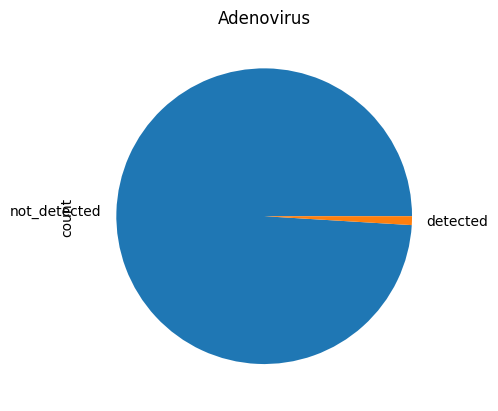

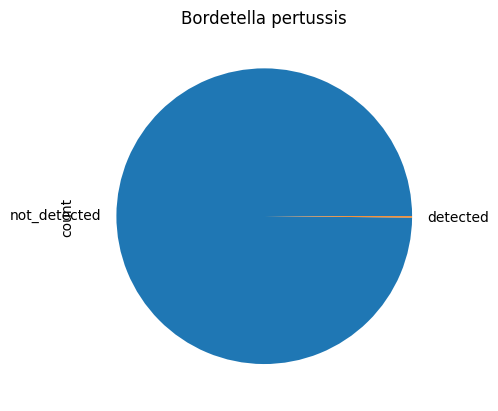

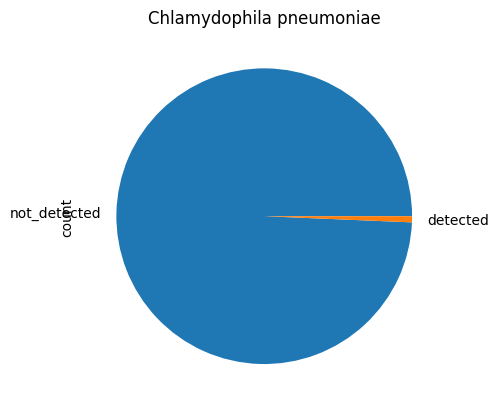

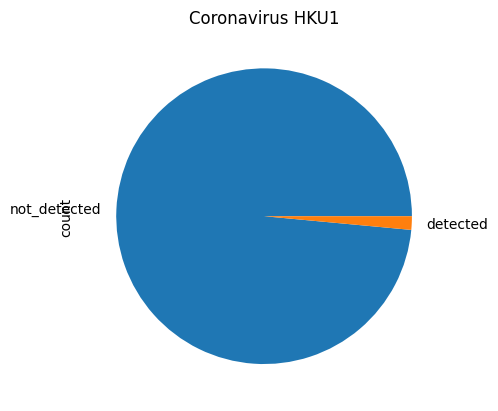

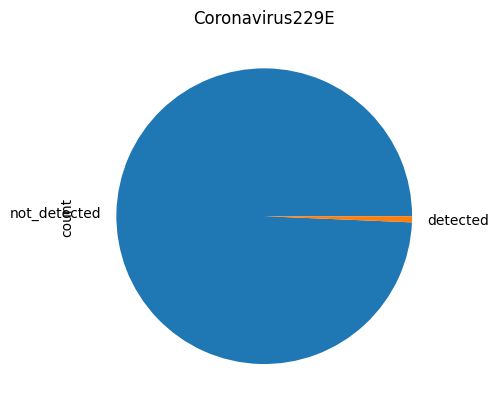

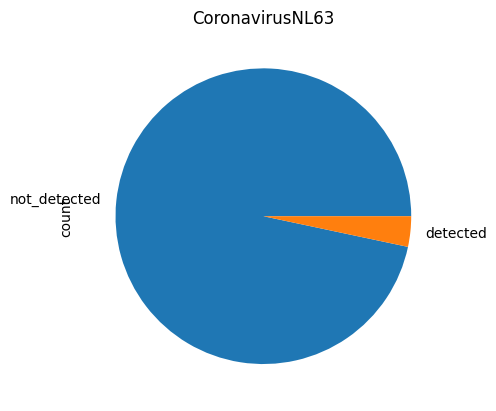

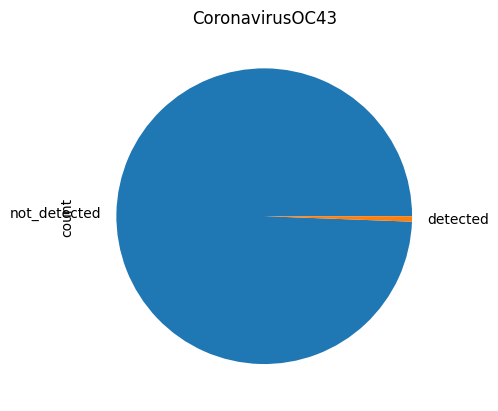

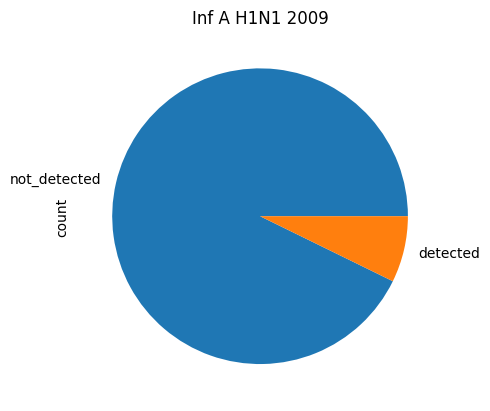

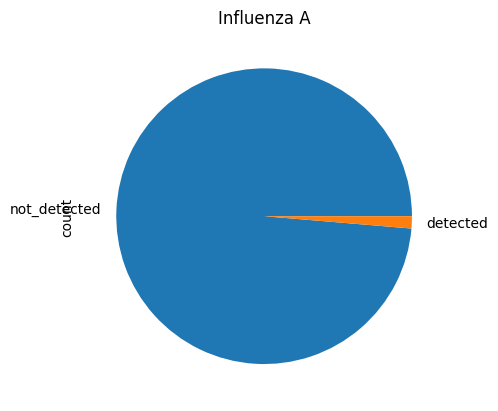

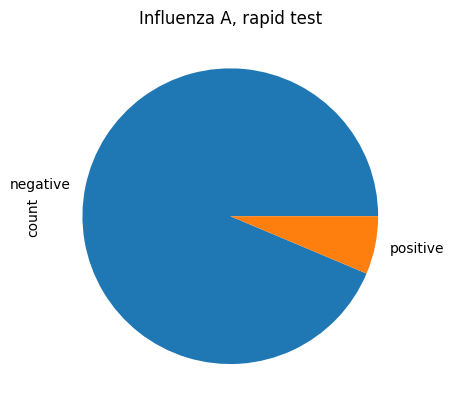

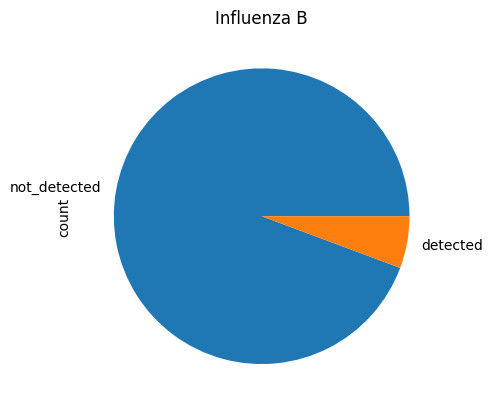

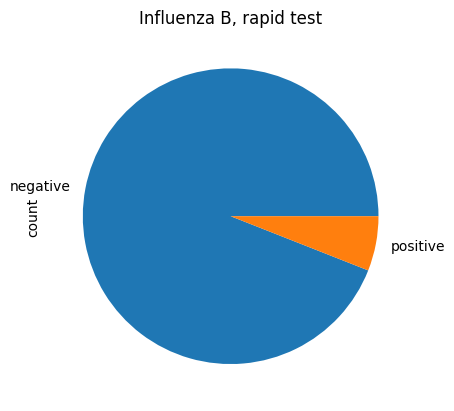

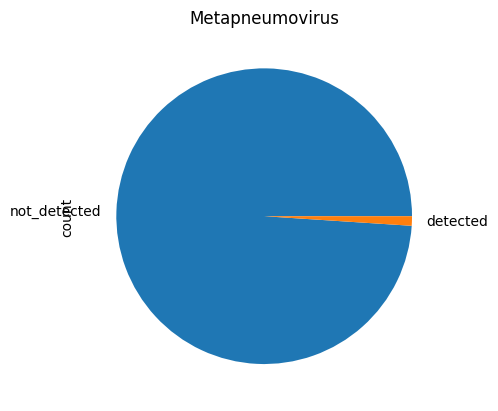

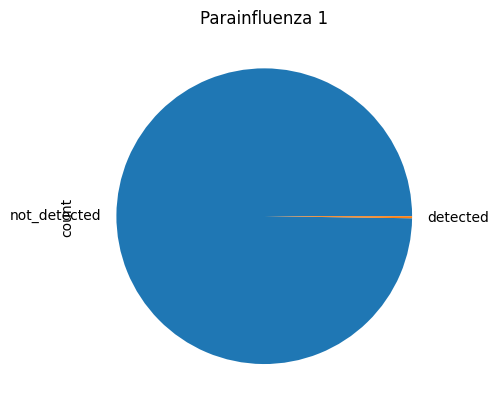

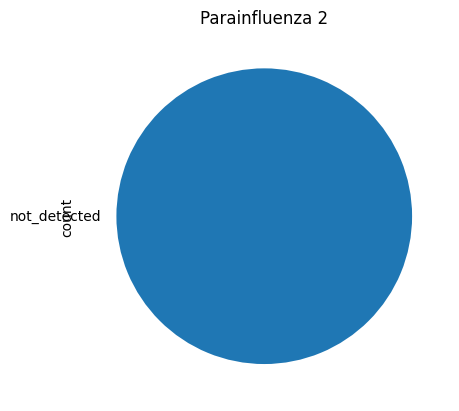

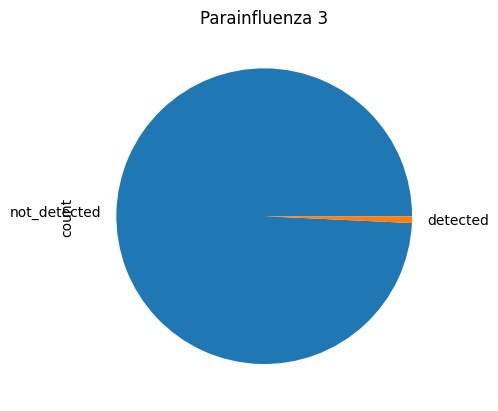

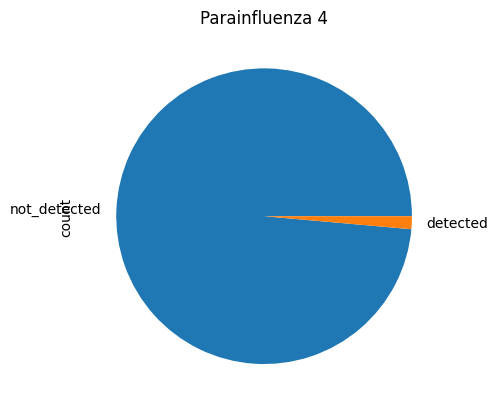

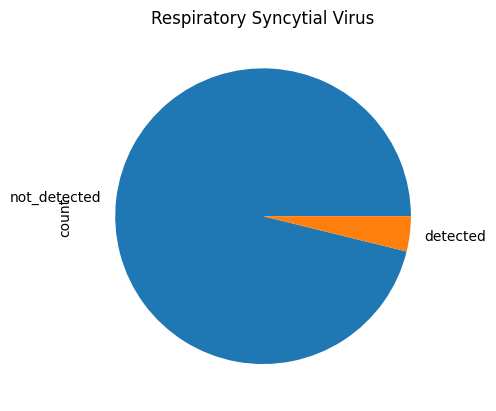

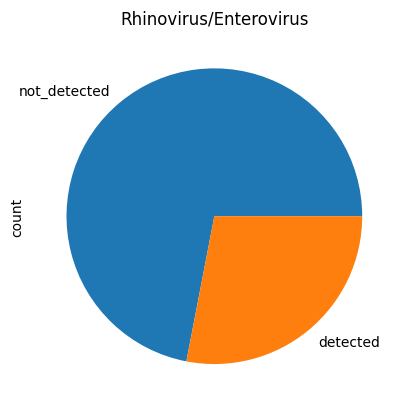

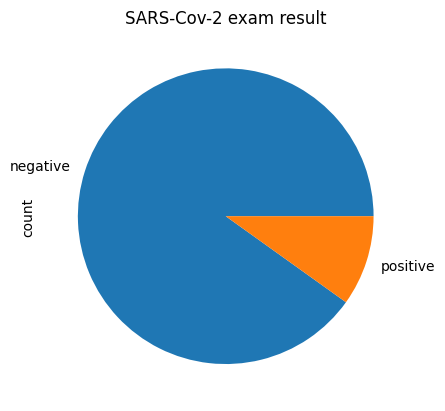

In [ ]:
for col in sorted(df.select_dtypes('object')):
  plt.figure()
  df[col].value_counts().plot.pie(title=col)

**Remark**: In most cases, our variables mainly consist of undetected pathology or disease.

Influenza A & B and the Rhinovirus have higher rate of positive case.

We have different outcome with Influenza rapid and classical tests

### Relationship between variables and target

> Objective: We want to undestand distribution and influence of positive and negtive cases of *SARS-Cov-2 exam result*


**Analysis**:
- Comparison of distribution of positive/negative classes for each quantitative variables


**Key obsevations**:
- Platelets, Leukocytes, (eosinophils) and Monocytes distribution differ between negative and positive patients.
- Age is mapped using an unknown process.
- Age distribution seems to have be the same among positive and negative class.
- There are not positive patient for *younger* age. It is only an idea but it seems *youger* patient (<3) are not positive. Due to the fact we don't know how the age is mapped and scienitific concensus states that COVID-19 can't touch everyone independently to their age, we will not consider this lead.

**Action taken**: None


**Future Consideration** : Age

We create subset of the dataset for COVID-19 positive and negative cases.

In [ ]:
positive_df = df[df["SARS-Cov-2 exam result"] == "positive"]
negative_df = df[df["SARS-Cov-2 exam result"] == "negative"]

**Assumption**: We would like to explore the relationship between the blood test information and the target.

In [ ]:
# Retrive the columns concerning blood test
missing_rate = df.isna().sum()/df.shape[0]

# Note: these information comes from the missing values ratio table we've previously seen
blood_columns = df.columns[(missing_rate > 0.89) & (missing_rate < 0.9)]

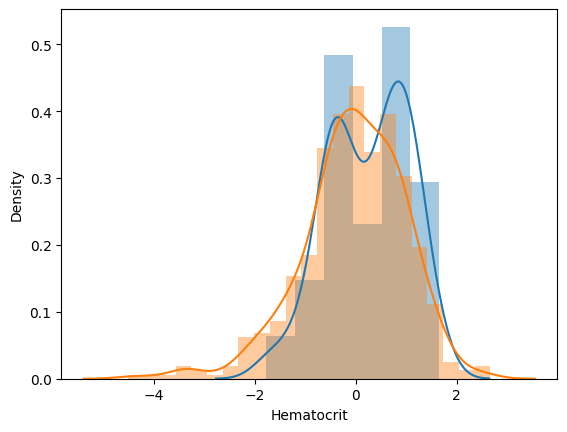

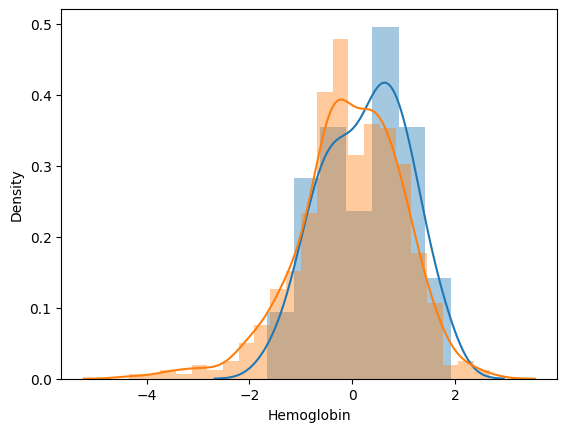

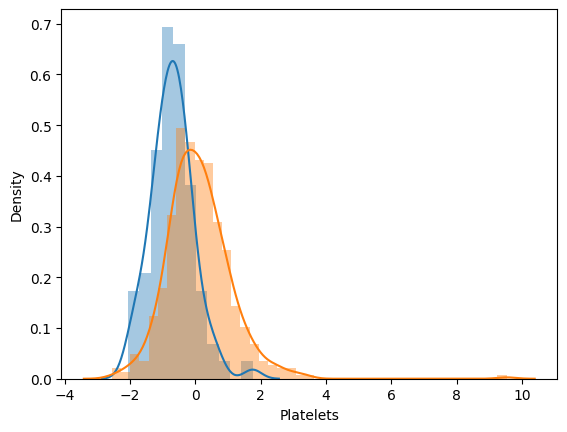

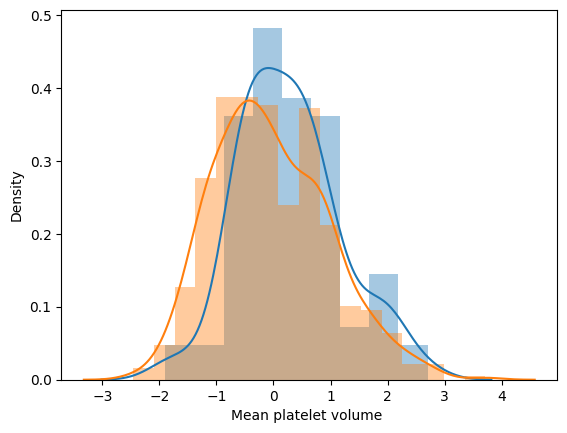

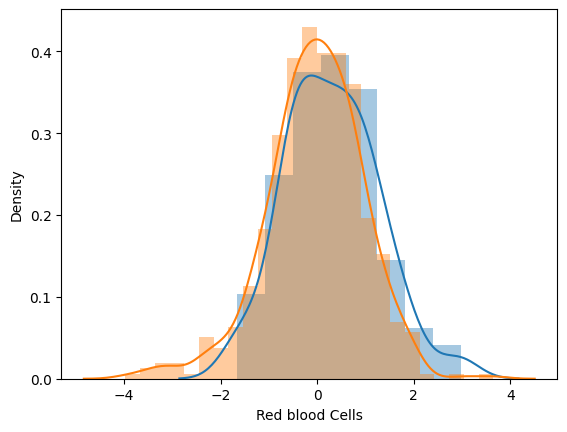

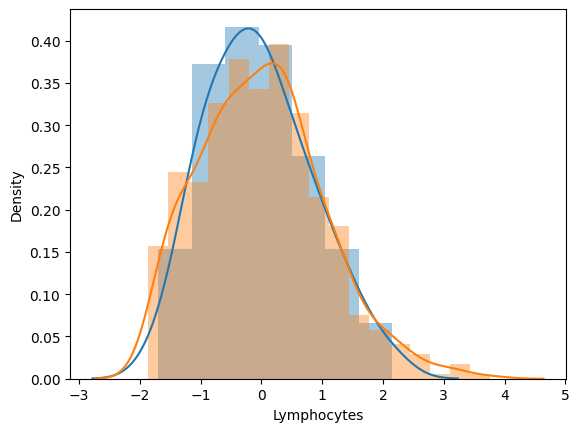

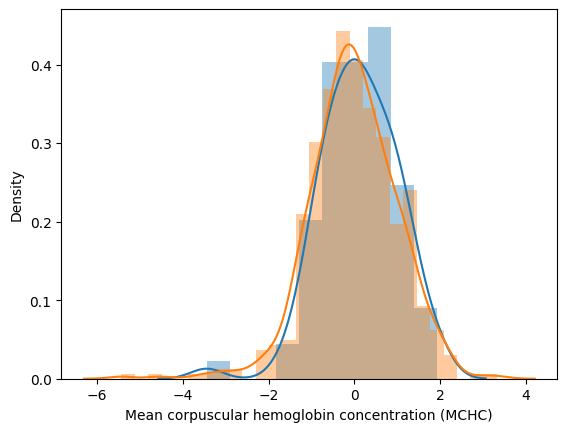

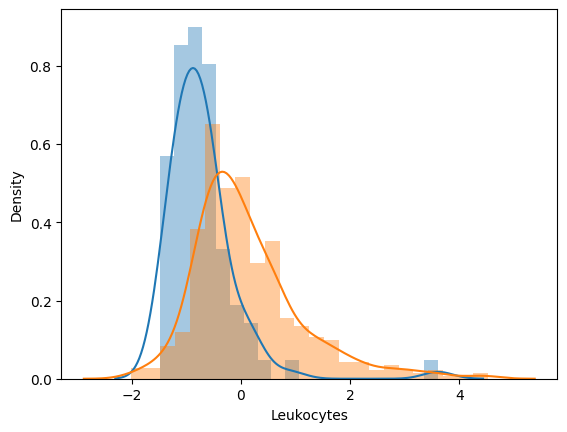

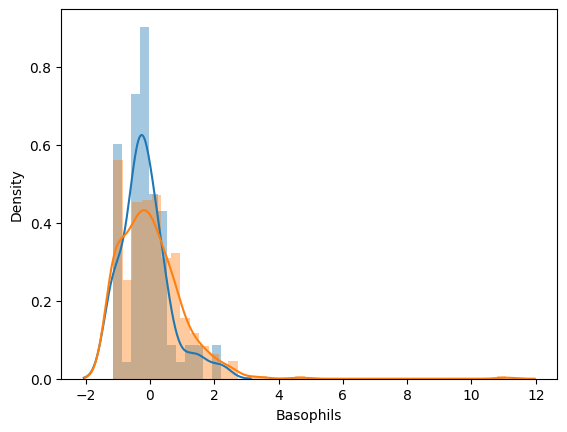

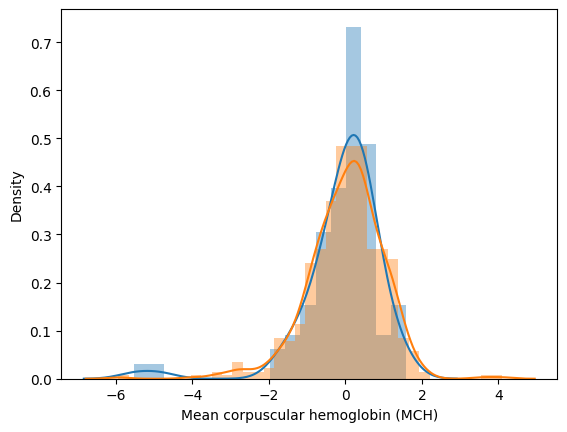

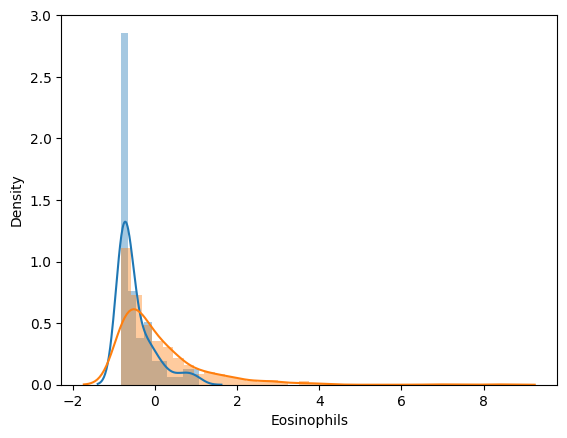

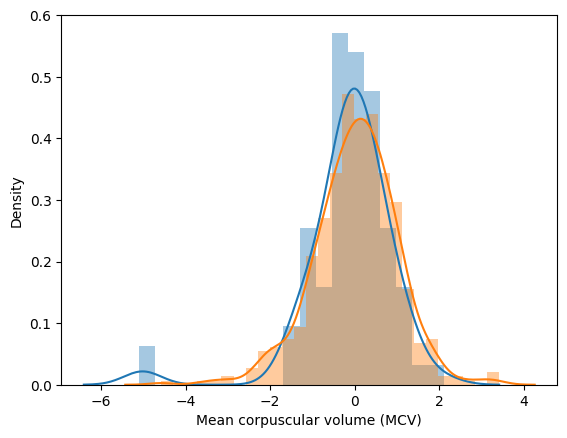

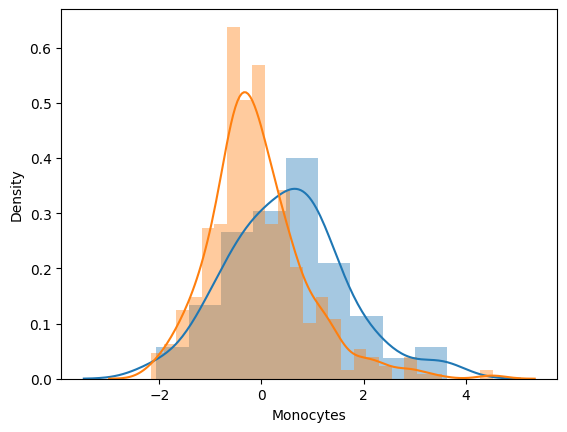

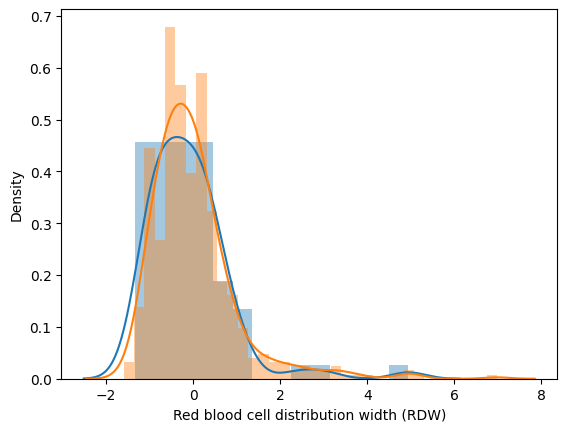

In [ ]:
for col in blood_columns:
  plt.figure()
  sns.distplot(positive_df[col], label="positive")
  sns.distplot(negative_df[col], label="negative")

**Remark**: we can see that Platelets, Leukocytes, (eosinophils) and Monocytes differs between negative and positive patients.

### Relationship between Age / Target

<Axes: xlabel='Patient age quantile', ylabel='Density'>

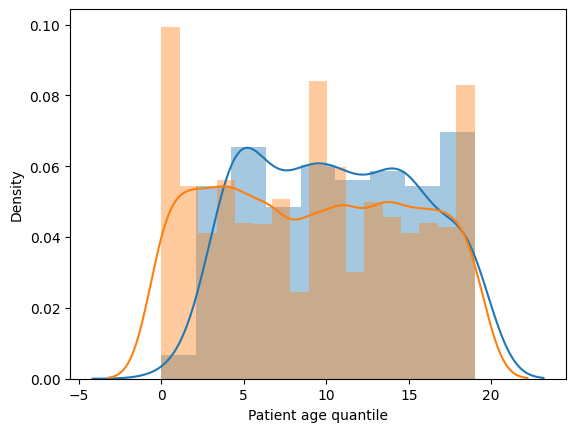

In [ ]:
sns.distplot(positive_df["Patient age quantile"])
sns.distplot(negative_df["Patient age quantile"])

<Axes: xlabel='Patient age quantile', ylabel='count'>

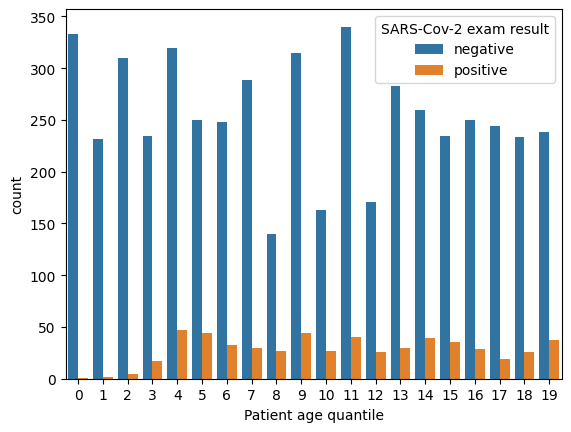

In [ ]:
sns.countplot(
    x="Patient age quantile",
    hue="SARS-Cov-2 exam result",
    data = df
)

**Remark**: Quite similar but we can observe that there are not positive patient for *younger* age. It is only an idea but it seems *youger* patient (<3) are not positive. Due to the fact we don't know how the age is mapped and scienitific concensus states that COVID-19 can't touch everyone independently to their age, we will not consider this lead.

### Relationship between Viral information / Target

**Analysis**
- Crosstab Heatmap visualization of target/features

**Key observations**:
- Double infections are rare. Rhinobirus/Enterovirus is frequent.

**Action Taken**: None

**Future Consideration**: None

In [ ]:
# We do the same for viral information
viral_columns =  df.columns[(missing_rate > 0.76) & (missing_rate < 0.86)]

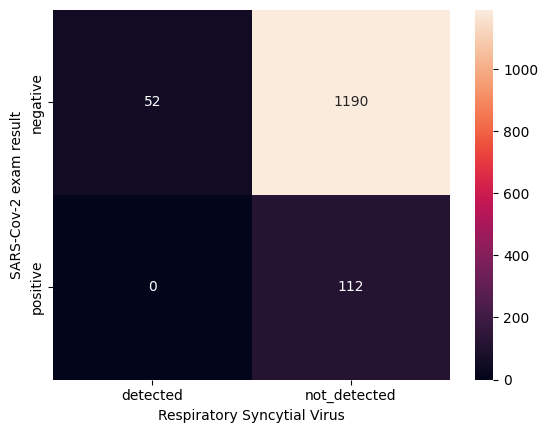

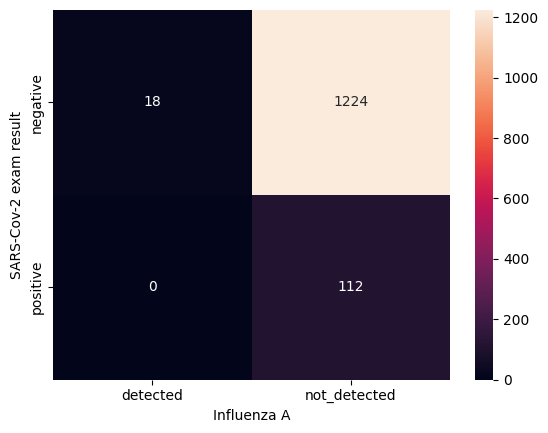

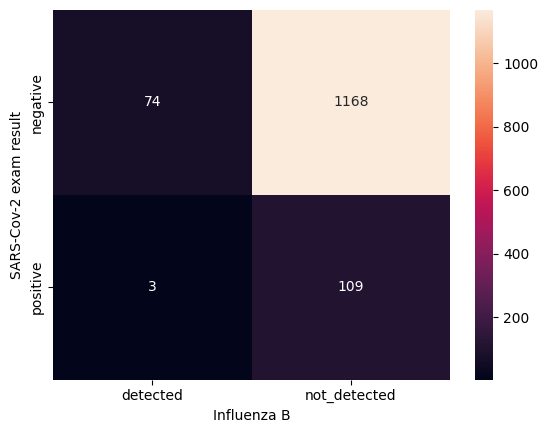

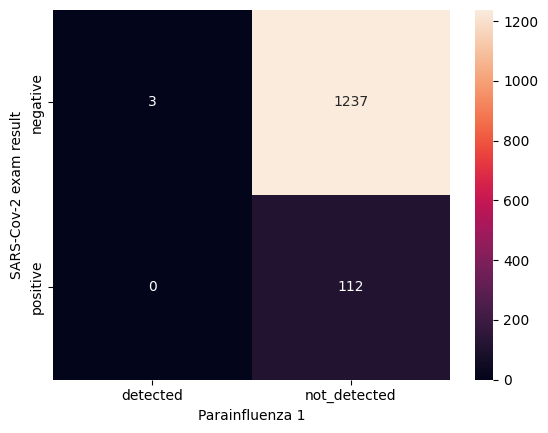

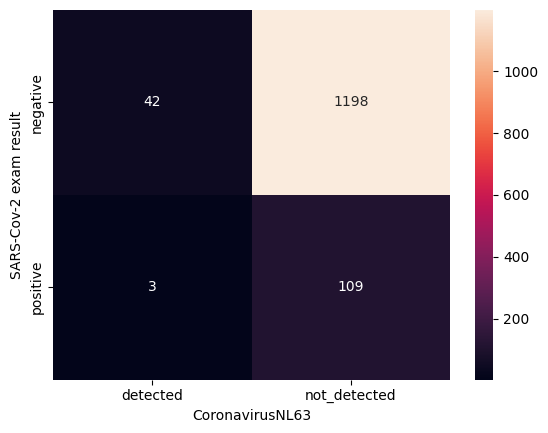

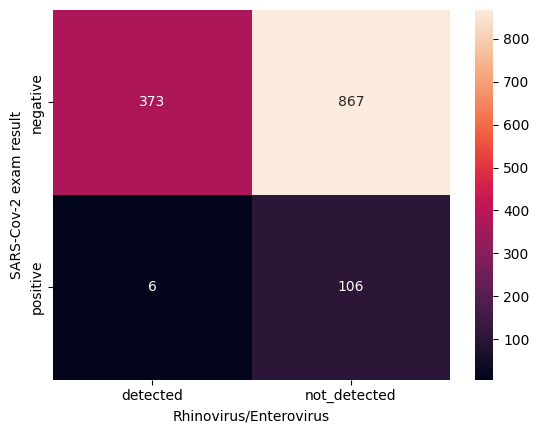

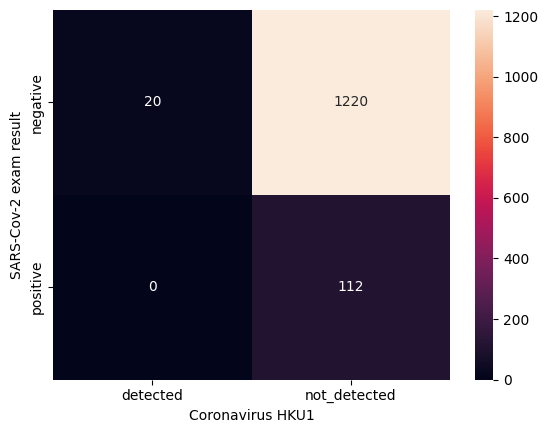

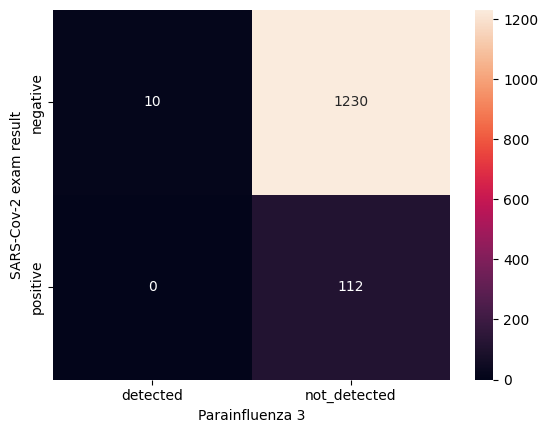

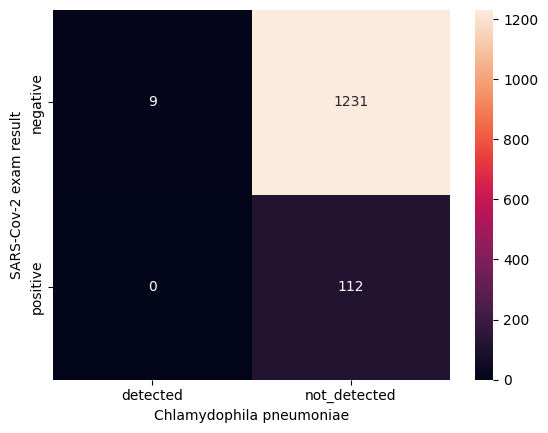

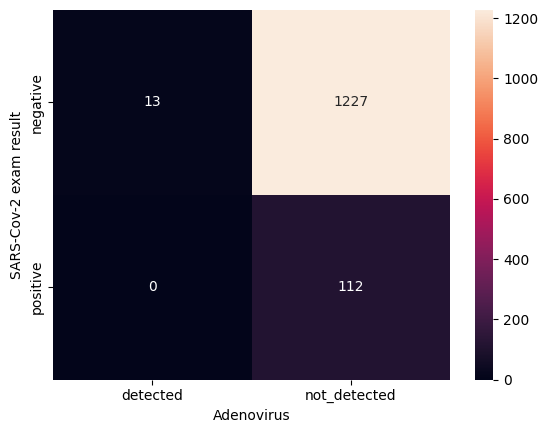

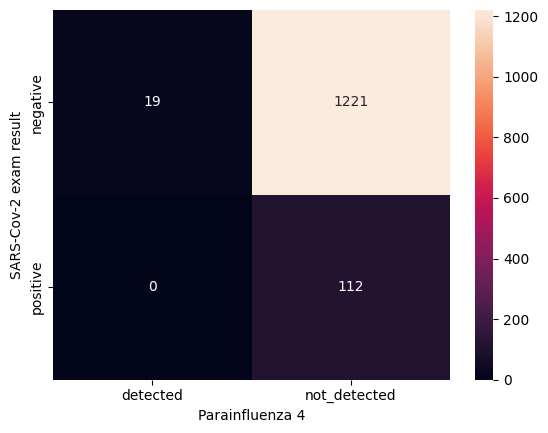

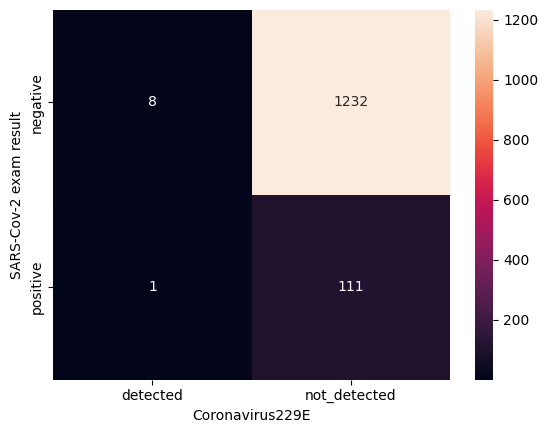

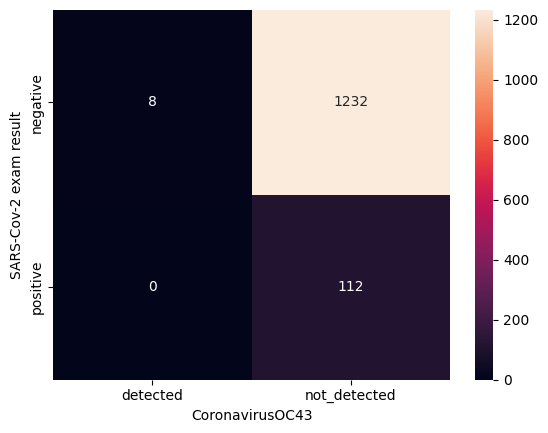

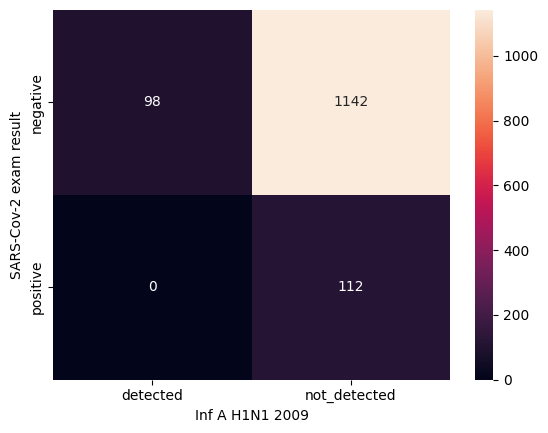

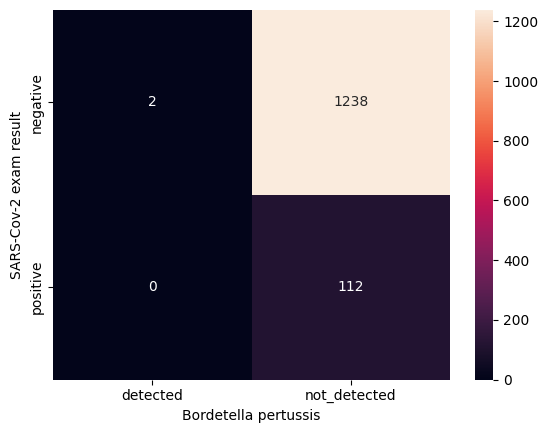

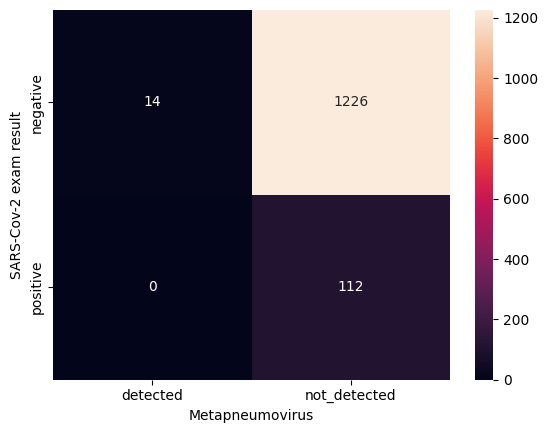

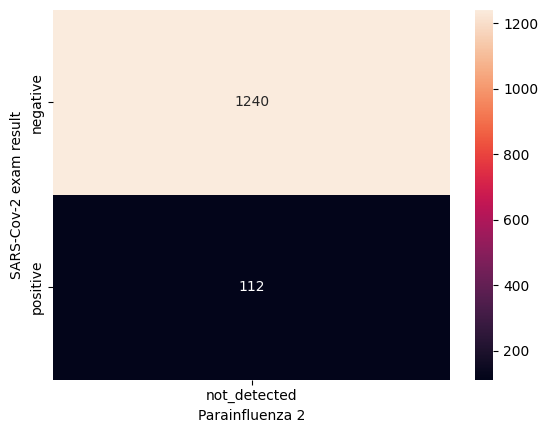

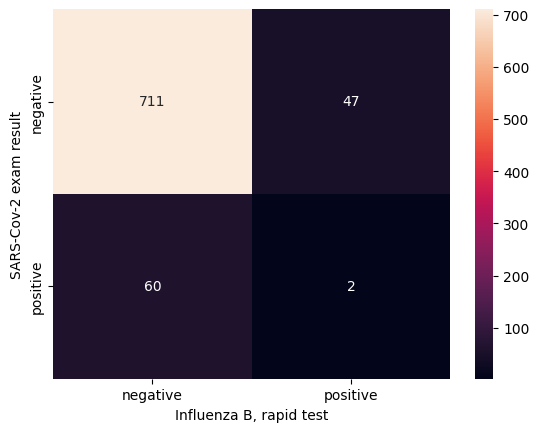

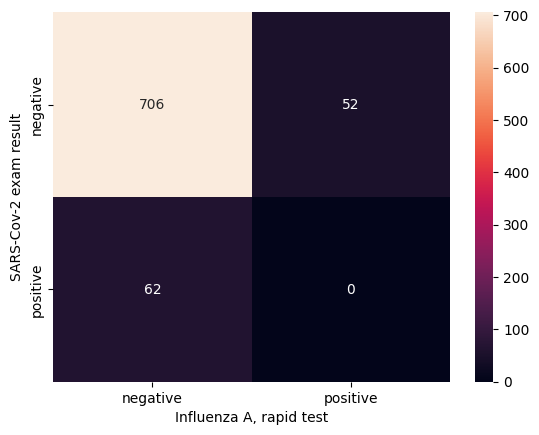

In [ ]:
for col in viral_columns:
  plt.figure()
  sns.heatmap(pd.crosstab(df["SARS-Cov-2 exam result"], df[col]), annot=True, fmt='d')

**Remark** : Double infections are rare. Rhinobirus/Enterovirus is frequent.
- 3 with *Influenza B*
- \>60 with Influenza A and B, rapid test
We can't jump into conclusion.

## Variable Correlation Analysis

### **Analysis**:

**variables / variables correlation**
- blood data / blood data
- blood data / age
- viral data / viral data
- disease / blood data
- hospitalisation / blood data
- hospitalisation / disease


### **Observation**:
- Some variables are highly correlated : e.g. red blood cells/hematocrit/hemoglobin
- We observe a very low correlation between the age and blood data.
- Rapid test seems unacurrate.
  - 15 false negative according to rapid tests for Influenza A
  - 18 false negative according to rapide test for Influenza B
- Some patient can be positive up to three diseases
- Sick patient has a difference with Lymphocytes
There is a difference in blood rate between patient sent to specific care type.

### **Action taken**:

- We can extract patient that are categoriazed as sick (at least one viral).
- Variable was mapped into a care type.

### **Future consideration**:
- We can create a new category for sick patient (at least one viral).'
- We can validate our assumptions using statistical tests
  - Blood rates are significantly different between negative/positive
  - Blood rates are significantly different between care type
  - etc...

### Relation blood rate

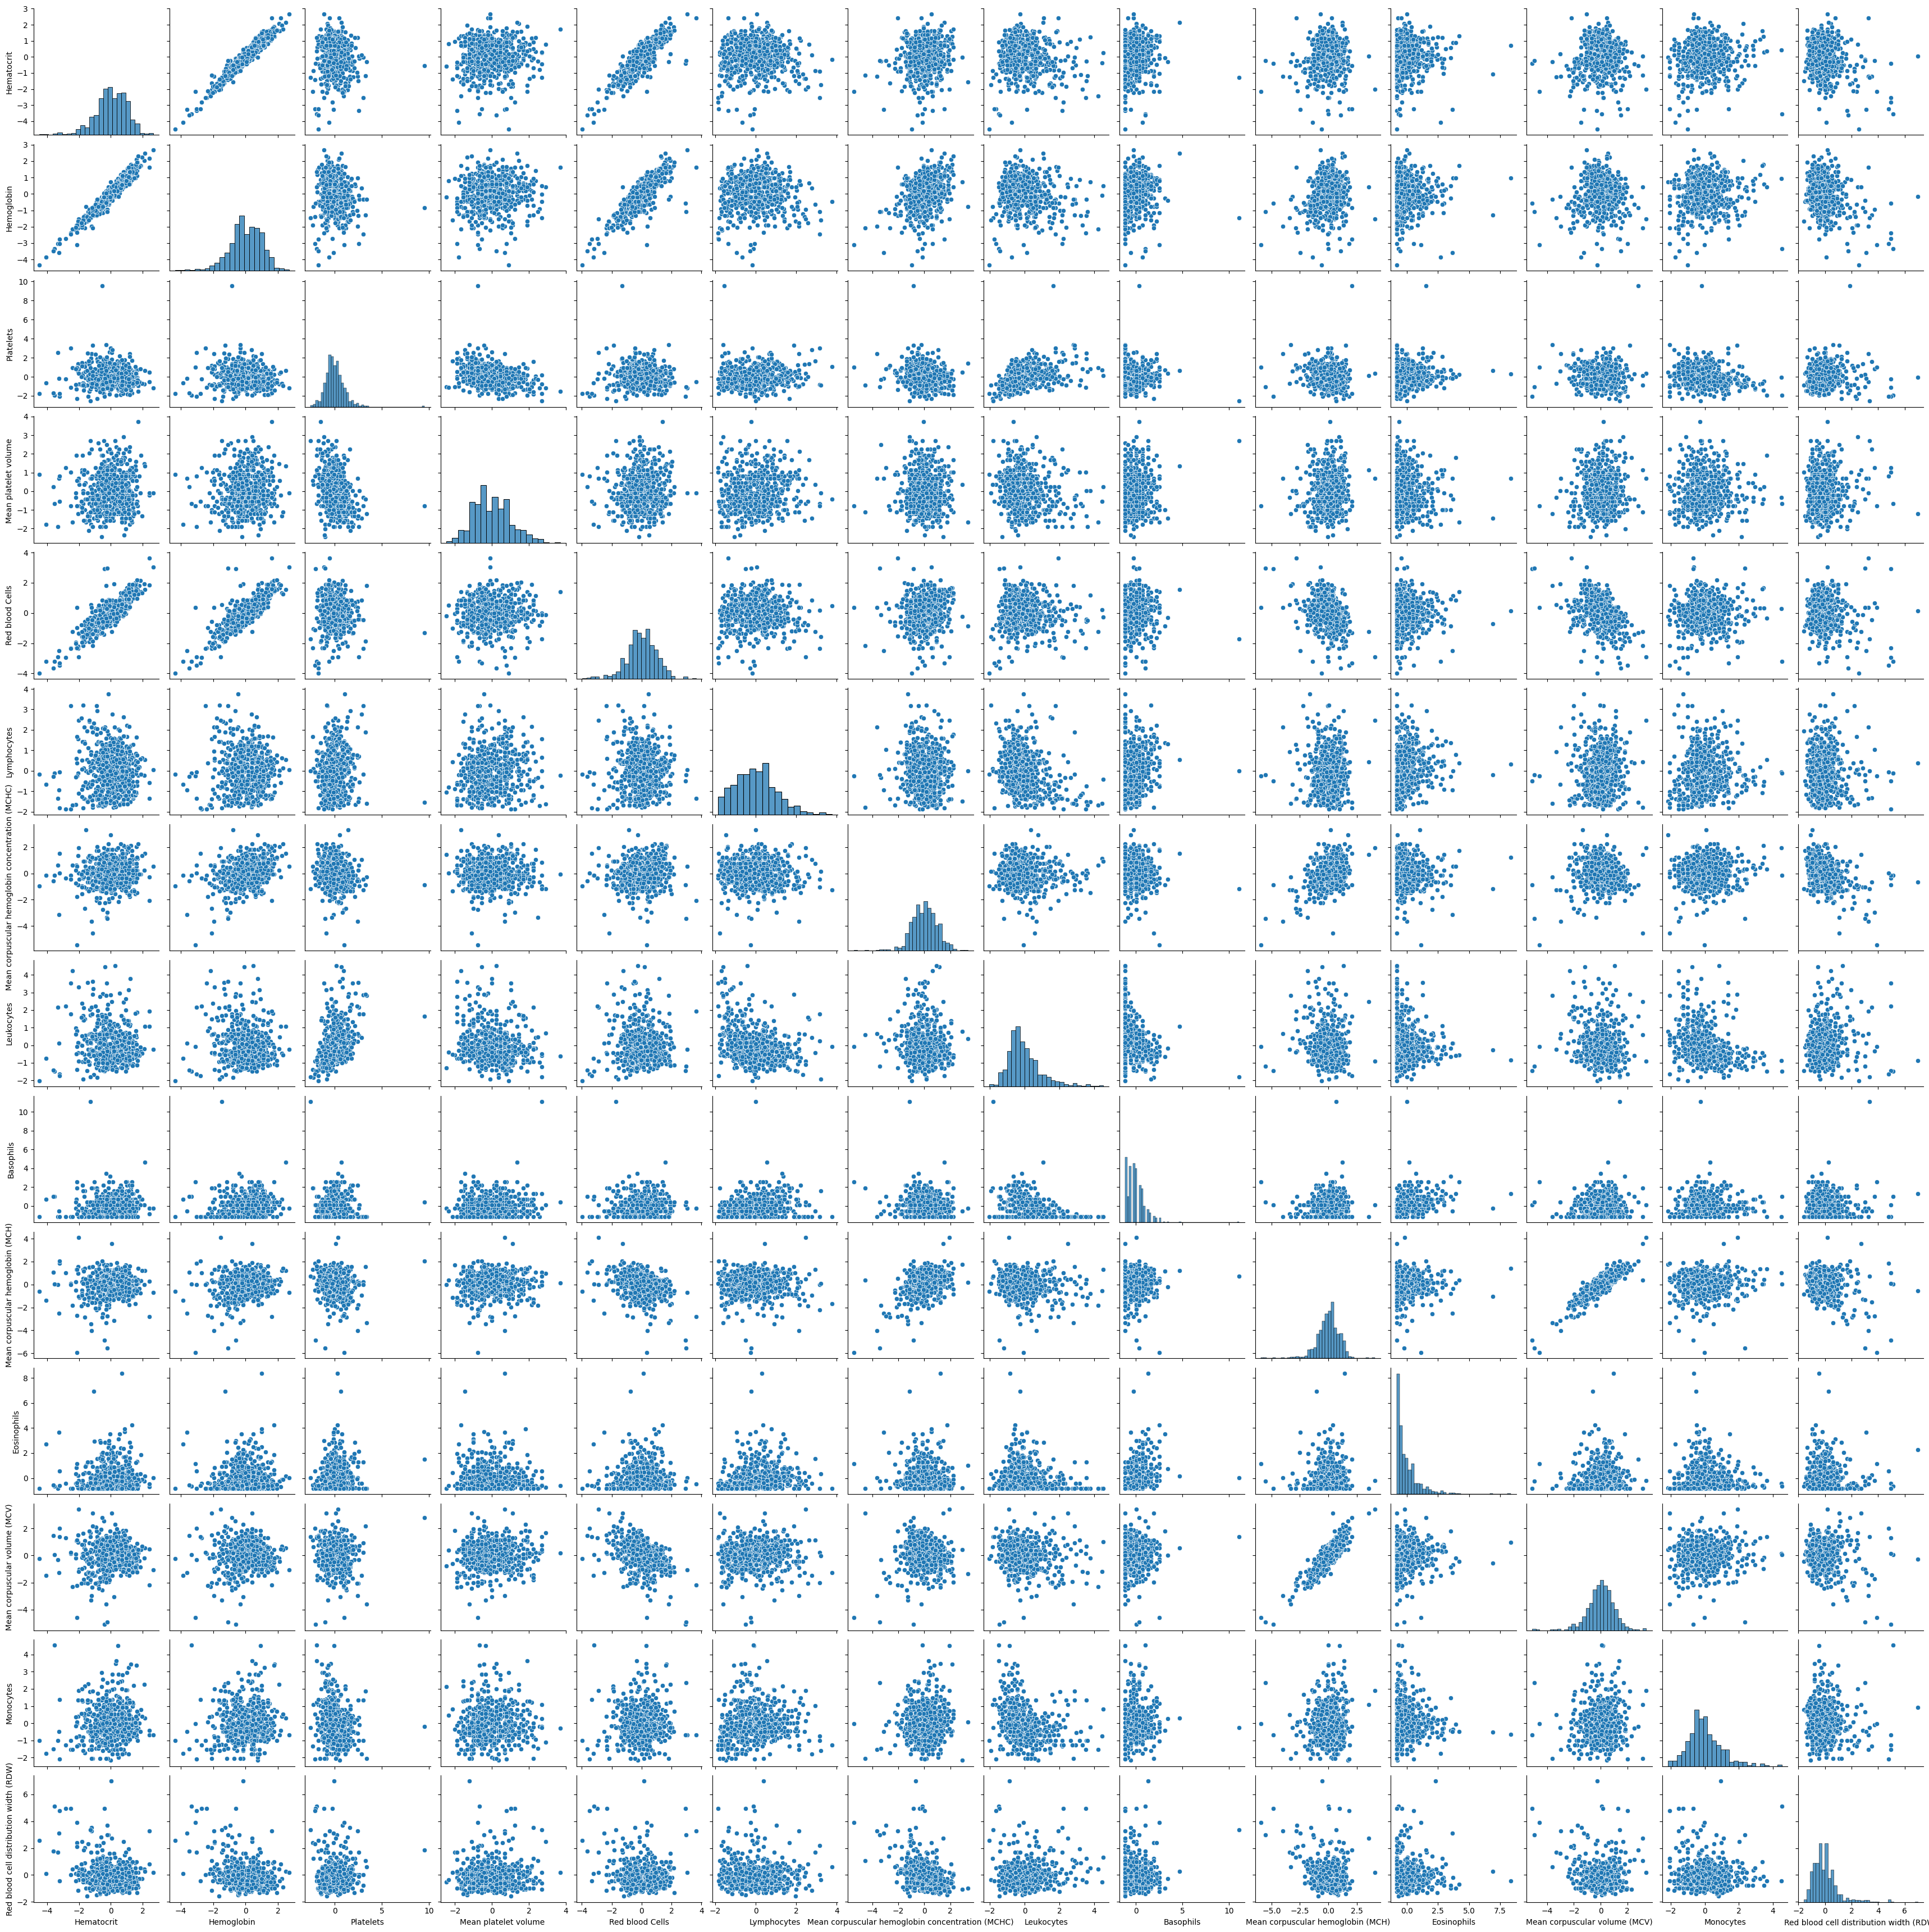

In [ ]:
sns.pairplot(df[blood_columns])

<Axes: >

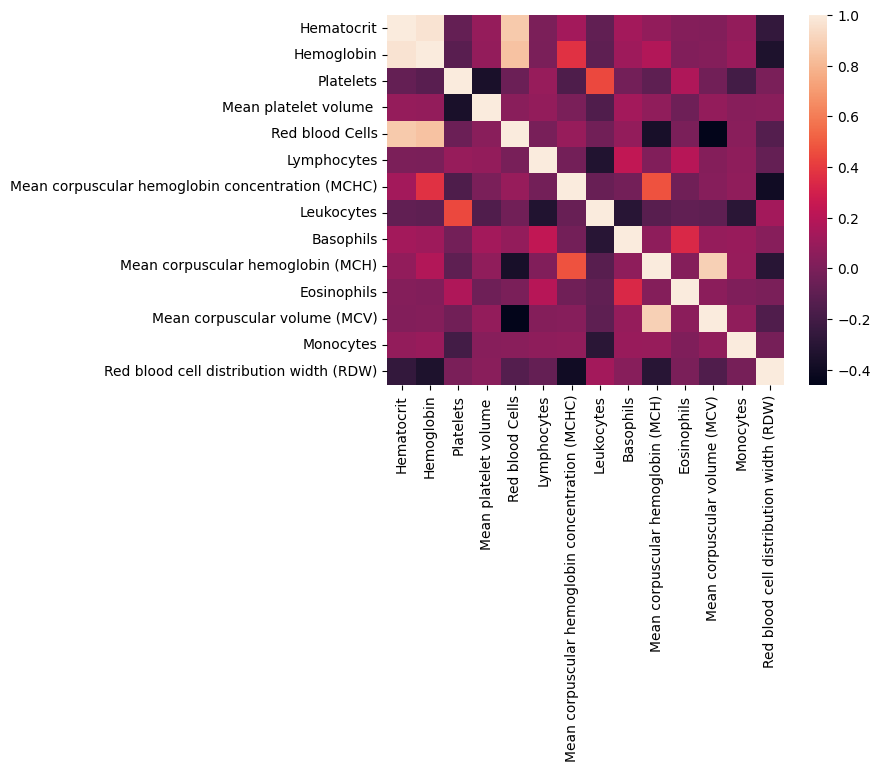

In [ ]:
sns.heatmap(df[blood_columns].corr())

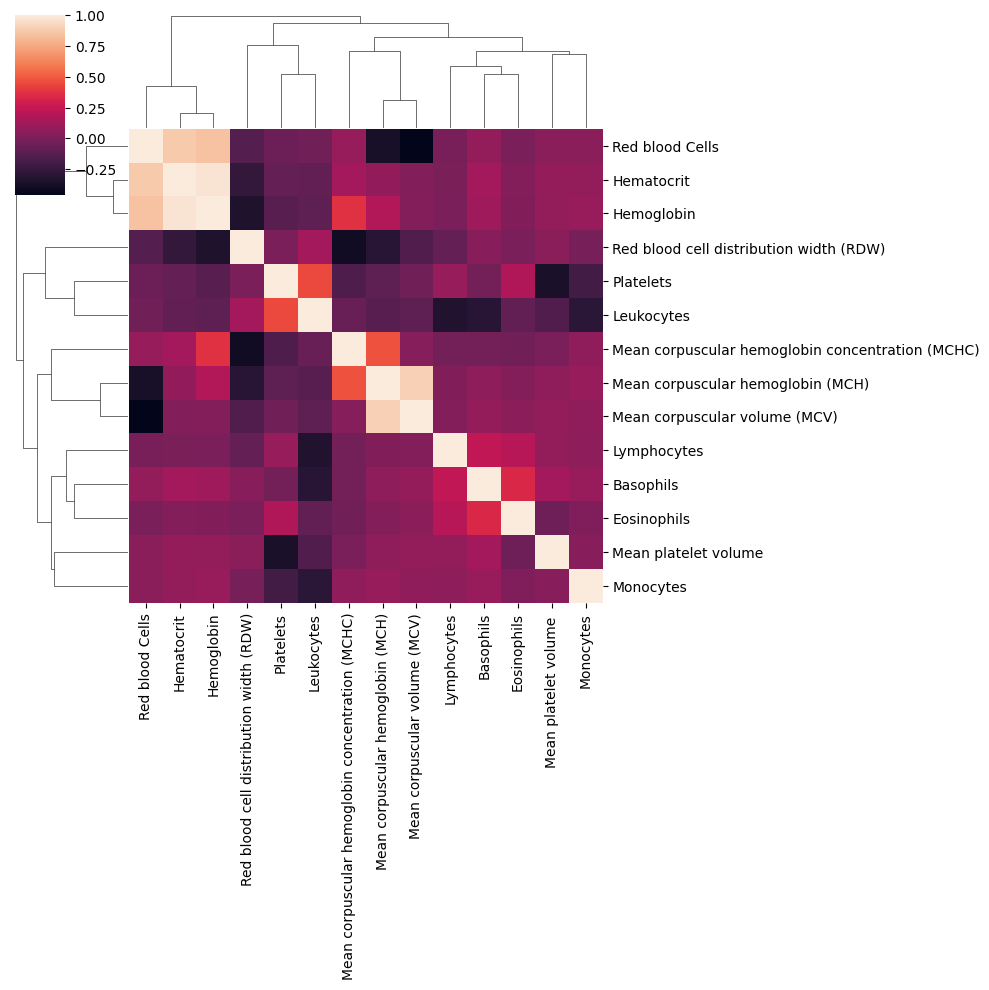

In [ ]:
sns.clustermap(df[blood_columns].corr())

**Remark**: Some variables are highly correlated : e.g. red blood cells/hematocrit/hemoglobin

### Relation Age / Blood

In [ ]:
df.select_dtypes("number").corr()['Patient age quantile'].sort_values(ascending=True)

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpuscular hemoglobin (MCH)                        0.197394
Mean corpuscular volume (MCV)                            0.281655
Patient age quantile                                     1.000000
Name: Patient age quantile, dtype: float64

**Remark**: We observe a very low correlation between the age and blood data.

### Viral data / rapid test viral data correlation

Observe the consistency between viral test and rapid test

In [ ]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [ ]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

**Remarks**:
- 15 false negative according to rapid tests for Influenza A
- 18 false negative according to rapide test for Influenza B

Conclusion: Rapid test seems unacurrate.

### Viral / Hospitalization

<Axes: >

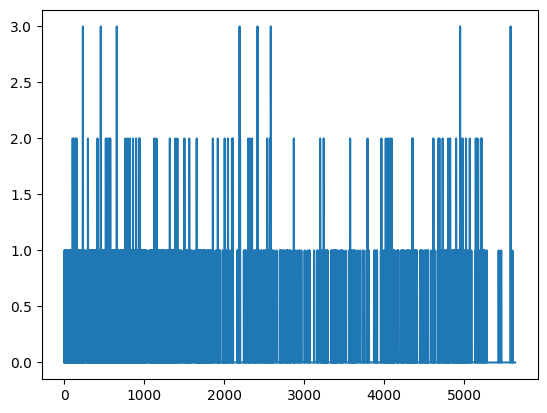

In [ ]:
np.sum(df[viral_columns][:-2] == "detected", axis=1).plot()

**Remark**: Some patient can be positive up to three diseases.

We can extract patient that are categoriazed as sick (at least one viral).

In [ ]:
df["sick"] = np.sum(df[viral_columns][:-2] == "detected", axis=1) >= 1
sick_df = df[df["sick"] == True]
non_sick_df = df[df["sick"] == False]

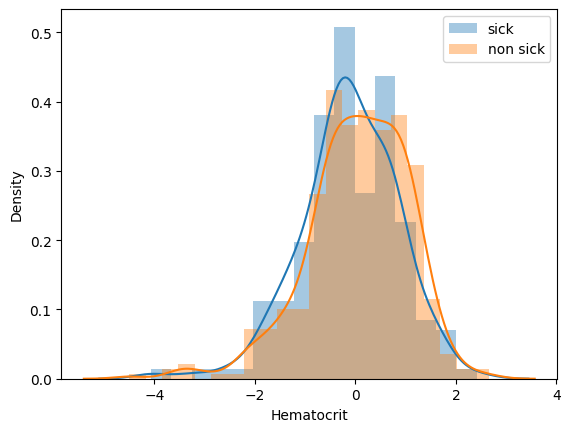

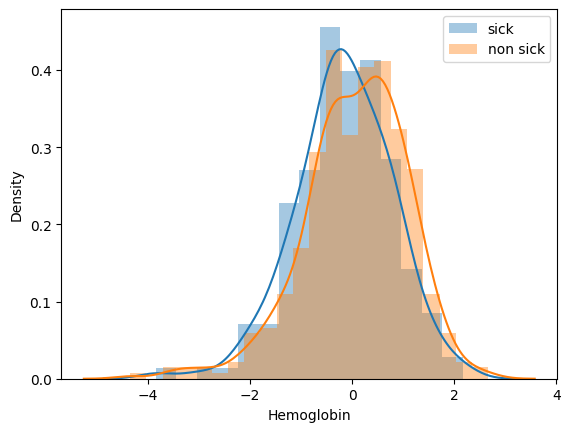

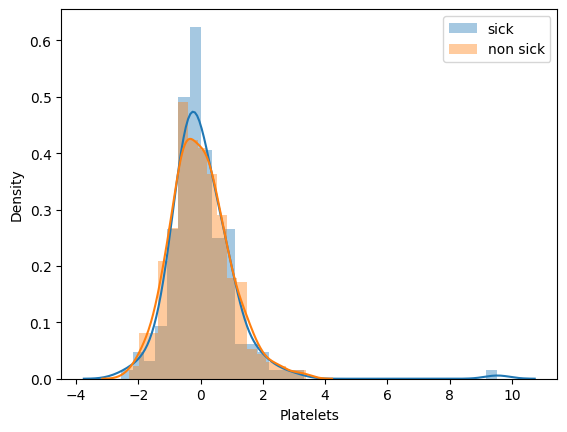

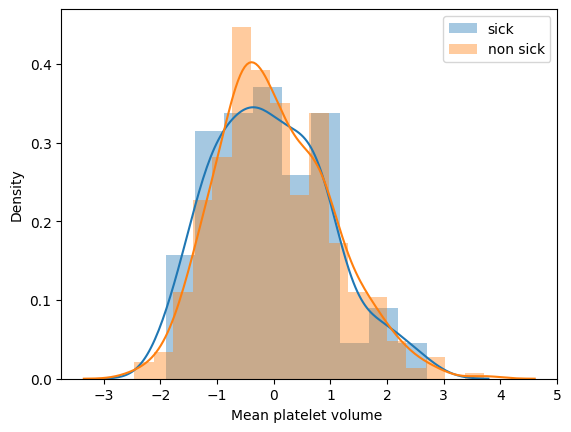

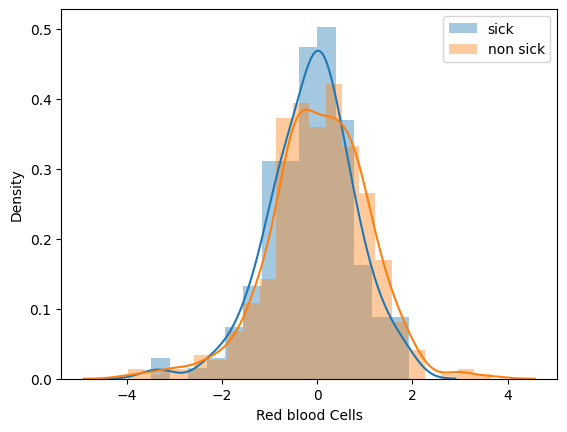

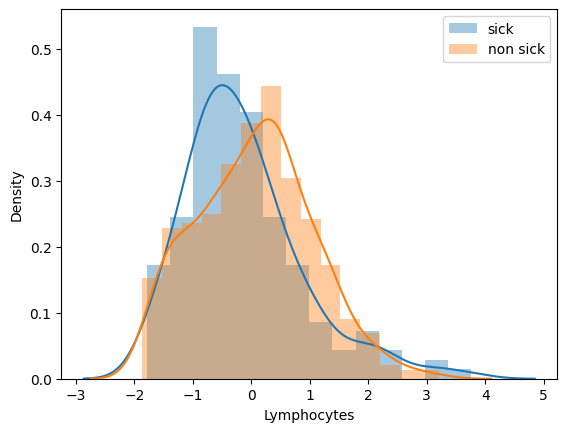

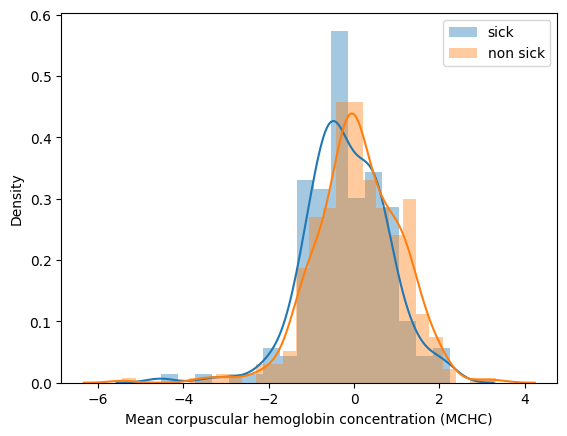

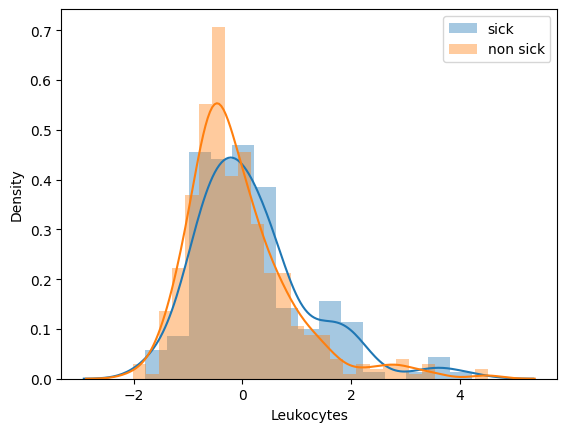

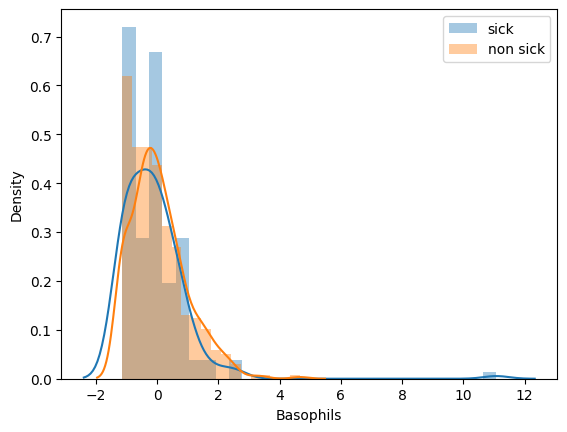

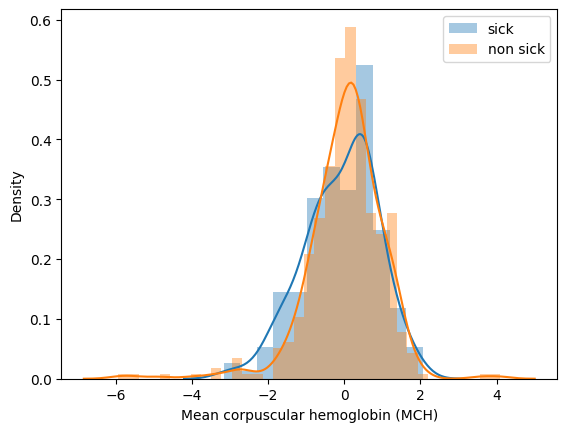

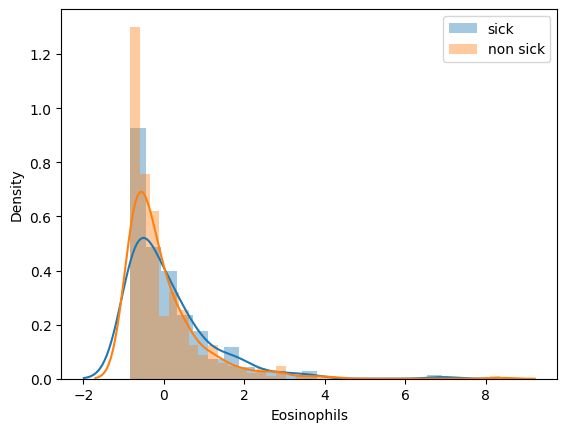

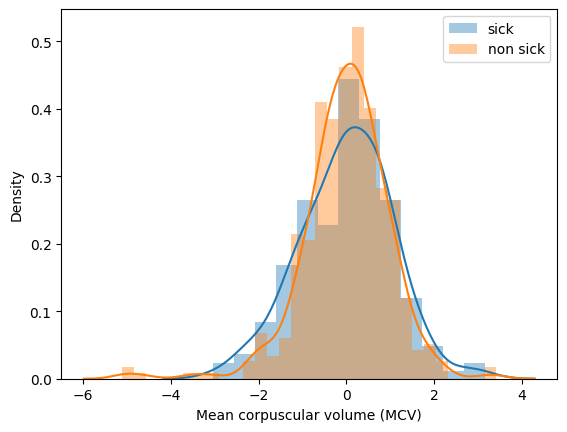

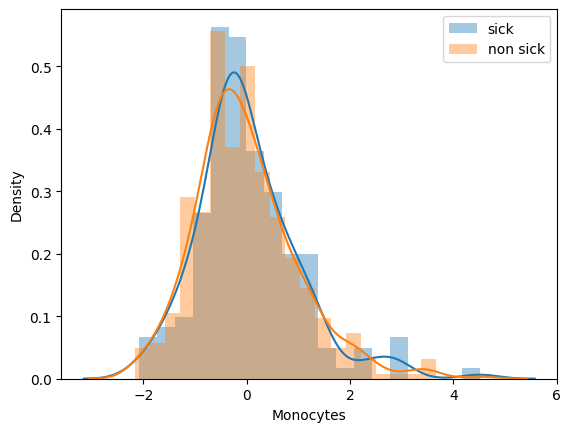

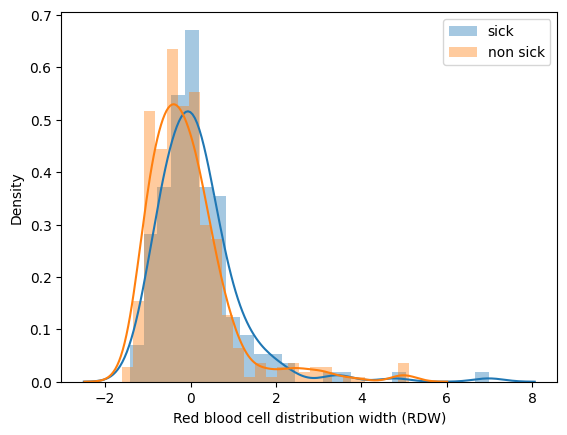

In [ ]:
for col in blood_columns:
  plt.figure()
  sns.distplot(sick_df[col], label='sick')
  sns.distplot(non_sick_df[col], label='non sick')
  plt.legend()

**Remark** : Difference with Lymphocytes

### Hospitalization

In [ ]:
# Create a function to map the value into a status
def hospitalization(df):
  if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1 : return 'surveillance'
  if df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1 : return 'semi-intensive care'
  if df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1 : return 'intensive care'
  return 'None'

df['status'] = df.apply(hospitalization, axis=1)

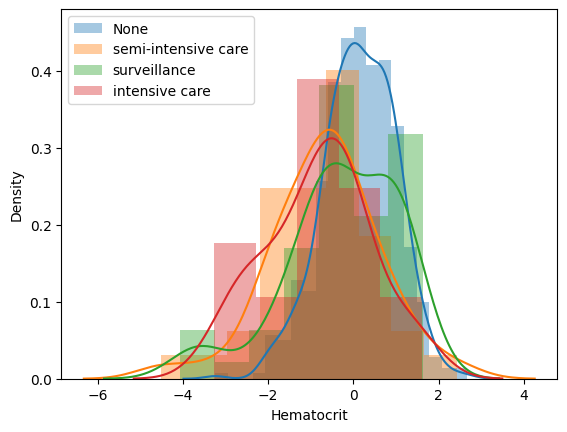

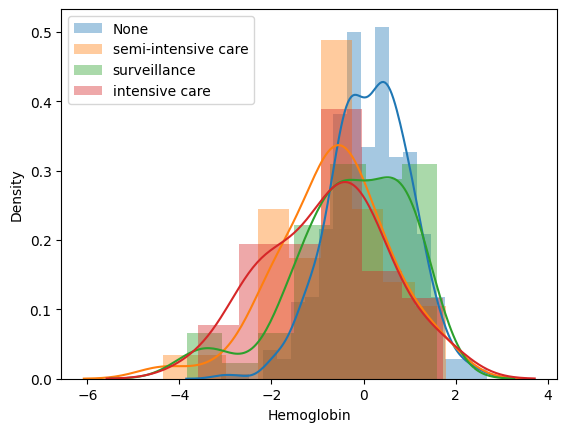

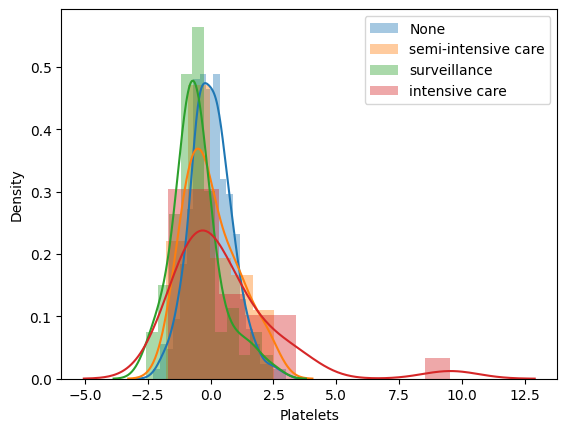

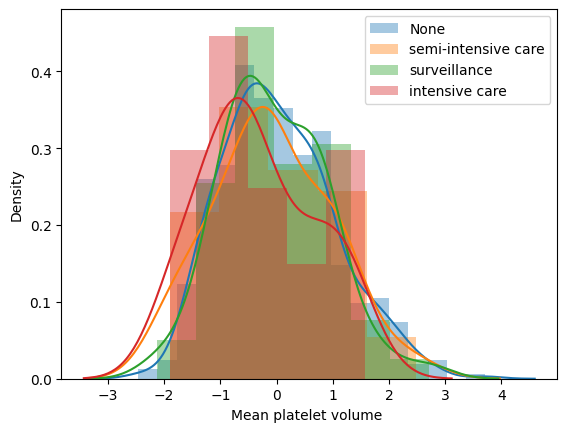

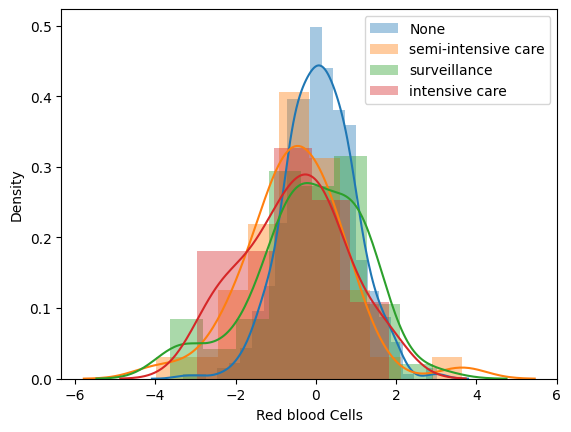

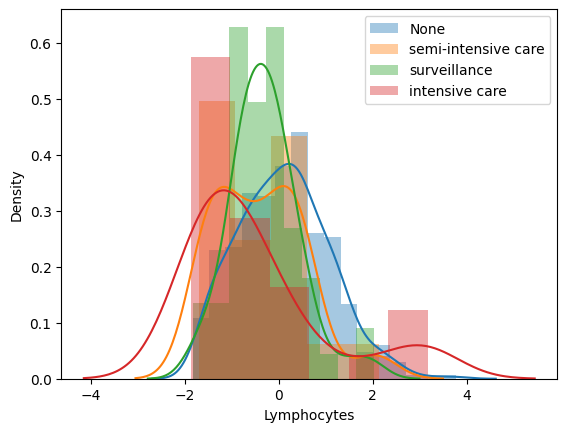

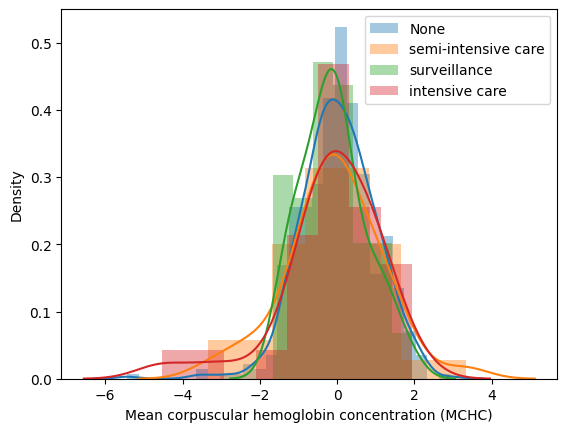

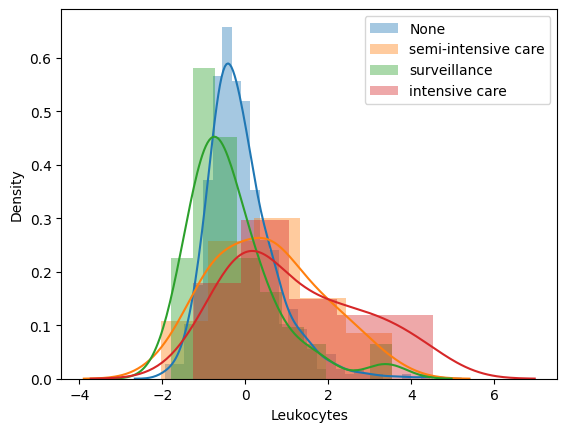

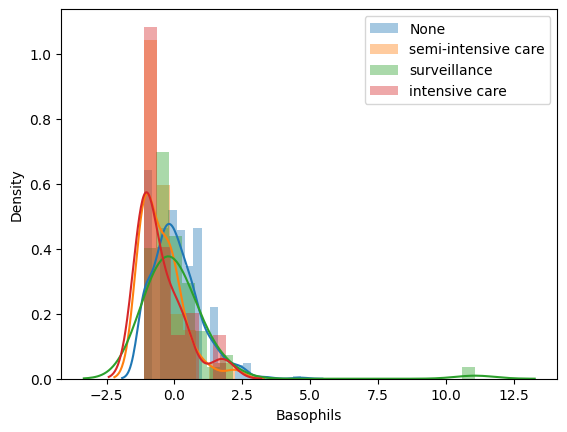

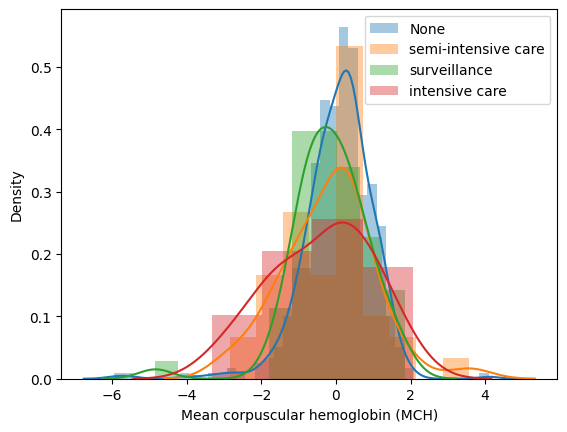

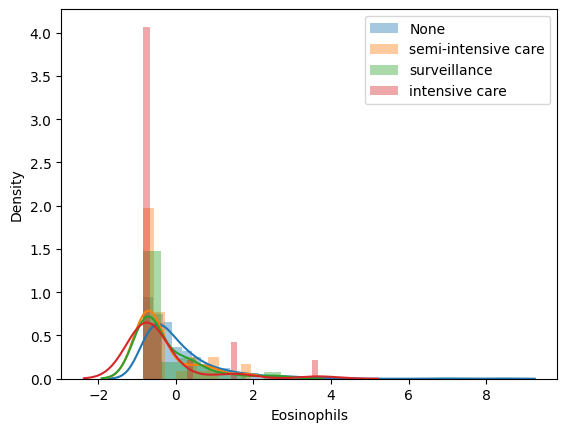

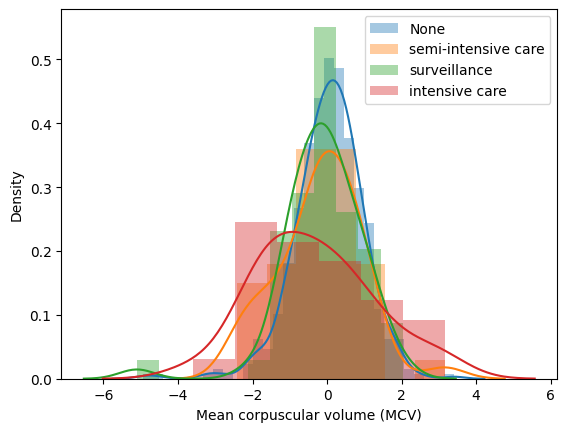

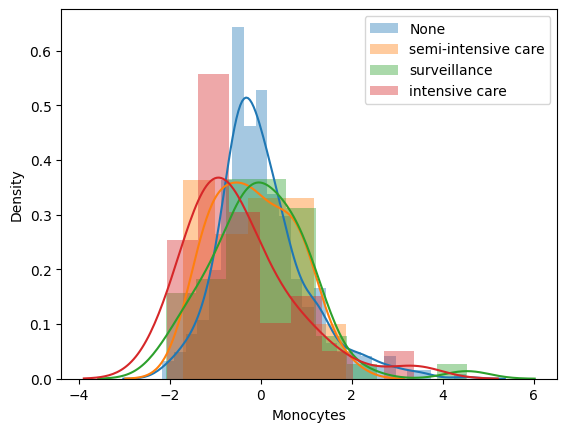

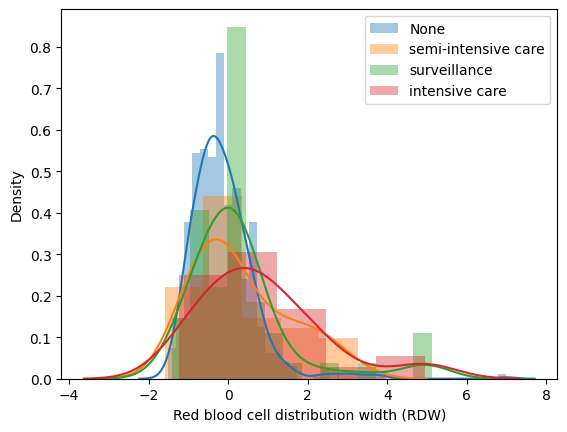

In [ ]:
for col in blood_columns:
  plt.figure()
  for cat in df['status'].unique():
    sns.distplot(df[df["status"] == cat][col], label=cat)
  plt.legend()

**Remark**: We can observe a difference in blood rate between patient sent to specific care type.